In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree+1):
        X_poly = np.concatenate((X_poly, X ** d), axis=1)
    return X_poly

def gaussian_basis_functions(X, centers, width):
    num_samples, num_features = X.shape
    num_centers = len(centers)
    phi = np.zeros((num_samples, num_centers))
    for i in range(num_samples):
        for j in range(num_centers):
            distance = np.linalg.norm(X[i] - centers[j])
            phi[i, j] = np.exp(-0.5 * (distance / width) ** 2)
    return phi


def ridge_regression(X, y, alpha):
    identity_matrix = np.identity(X.shape[1])
    weights = np.linalg.inv(X.T @ X + alpha * identity_matrix) @ X.T @ y
    return weights

complexities = [2, 4, 8, 16, 32, 128, 256]
regularization_params = [1e-10, 1e-20, 1e-30]

In [ ]:
for complexity in complexities:
    for reg_param in regularization_params:
        X_train_poly = polynomial_features(X_train, complexity)

        # Applying Gaussian basis functions to the polynomial features
        centers = np.linspace(X_train_poly.min(), X_train_poly.max(), complexity)
        width = (X_train_poly.max() - X_train_poly.min()) / complexity
        phi_train = gaussian_basis_functions(X_train_poly, centers, width)

        weights = ridge_regression(phi_train, y_train, reg_param)

        # Predictions for training data
        phi_test = gaussian_basis_functions(polynomial_features(X_test, complexity), centers, width)
        y_pred_train = phi_train @ weights

        # 3D Plot for training data
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Plot input data
        ax.scatter(X_train['x1'], X_train['x2'], y_train, c='r', marker='o', label='Actual')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')

        # Create grid of values for prediction
        xx, yy = np.meshgrid(np.linspace(X_train['x1'].min(), X_train['x1'].max(), 100),
                             np.linspace(X_train['x2'].min(), X_train['x2'].max(), 100))
        grid_data = np.c_[xx.ravel(), yy.ravel()]
        grid_poly = polynomial_features(grid_data, complexity)
        grid_phi = gaussian_basis_functions(grid_poly, centers, width)

        # Predict and plot the surface
        zz = grid_phi @ weights
        zz = zz.reshape(xx.shape)
        ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.5)

        plt.title(f"Model Complexity: {complexity}, Regularization: {reg_param} (Training Data)")
        plt.show()

        # Print mean squared error for training data
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        print(f"Mean Squared Error (Complexity: {complexity}, Regularization: {reg_param}) on Training Data: {mse_train:.2f}")


Output hidden; open in https://colab.research.google.com to view.

#Test Data

In [ ]:
for complexity in complexities:
    for reg_param in regularization_params:
        X_train_poly = polynomial_features(X_train, complexity)

        # Applying Gaussian basis functions to the polynomial features for training data
        centers = np.linspace(X_train_poly.min(), X_train_poly.max(), complexity)
        width = (X_train_poly.max() - X_train_poly.min()) / complexity
        phi_train = gaussian_basis_functions(X_train_poly, centers, width)

        # Training the model
        weights = ridge_regression(phi_train, y_train, reg_param)

        # Applying Gaussian basis functions to the polynomial features for testing data
        X_test_poly = polynomial_features(X_test, complexity)
        phi_test = gaussian_basis_functions(X_test_poly, centers, width)

        # Predictions for testing data
        y_pred_test = phi_test @ weights

        # 3D Plot for testing data
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Plot input data
        ax.scatter(X_test['x1'], X_test['x2'], y_test, c='r', marker='o', label='Actual')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')

        # Create grid of values for prediction
        xx, yy = np.meshgrid(np.linspace(X_test['x1'].min(), X_test['x1'].max(), 100),
                             np.linspace(X_test['x2'].min(), X_test['x2'].max(), 100))
        grid_data = np.c_[xx.ravel(), yy.ravel()]
        grid_poly = polynomial_features(grid_data, complexity)
        grid_phi = gaussian_basis_functions(grid_poly, centers, width)

        # Predict and plot the surface
        zz = grid_phi @ weights
        zz = zz.reshape(xx.shape)
        ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.5)

        plt.title(f"Model Complexity: {complexity}, Regularization: {reg_param} (Testing Data)")
        plt.show()

        # Print mean squared error for testing data
        mse_test = np.mean((y_test - y_pred_test) ** 2)
        print(f"Mean Squared Error (Complexity: {complexity}, Regularization: {reg_param}) on Testing Data: {mse_test:.2f}")


Output hidden; open in https://colab.research.google.com to view.

#Plotting model output vs. target output for training data and Test Data

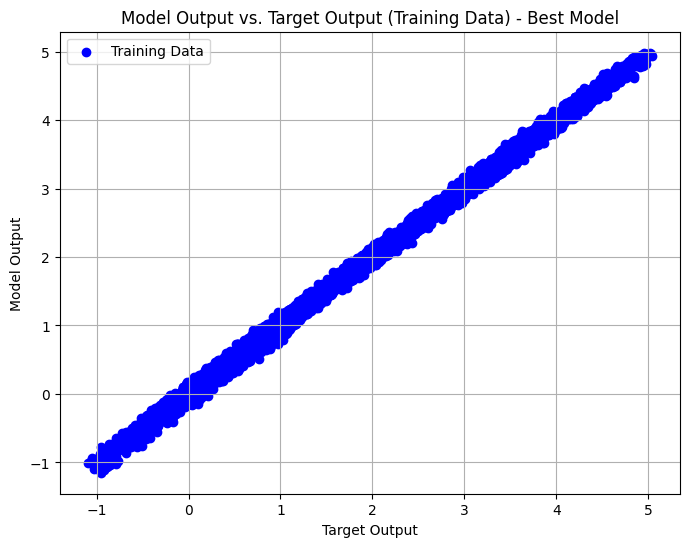

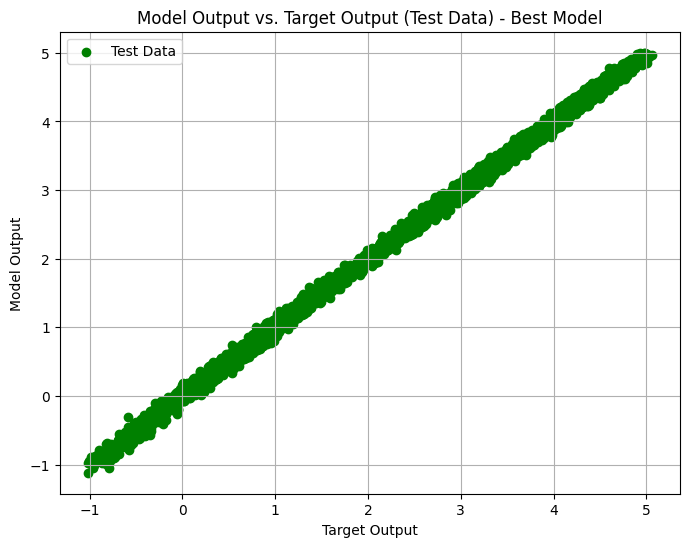

Best Complexity: 32
Best Regularization Parameter: 0.01
Mean Squared Error (Test Data) - Best Model: 0.01


In [ ]:


# Load data from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree+1):
        X_poly = np.concatenate((X_poly, X ** d), axis=1)
    return X_poly

def gaussian_basis_functions(X, centers, width):
    return np.exp(-0.5 * ((X - centers) / width) ** 2)

def ridge_regression(X, y, alpha):
    identity_matrix = np.identity(X.shape[1])
    weights = np.linalg.inv(X.T @ X + alpha * identity_matrix) @ X.T @ y
    return weights

best_mse = float('inf')
best_complexity = 0
best_reg_param = 0

for complexity in [2, 4, 8, 16, 32, 128, 256]:
    for reg_param in [0.01, 0.1, 1]:
        X_train_poly = polynomial_features(X_train, complexity)
        X_test_poly = polynomial_features(X_test, complexity)

        weights = ridge_regression(X_train_poly, y_train, reg_param)

        y_pred_train = X_train_poly @ weights
        y_pred_test = X_test_poly @ weights

        mse_test = np.mean((y_test - y_pred_test) ** 2)

        if mse_test < best_mse:
            best_mse = mse_test
            best_complexity = complexity
            best_reg_param = reg_param

# Re-train the model with the best complexity and regularization parameter
X_train_poly = polynomial_features(X_train, best_complexity)
X_test_poly = polynomial_features(X_test, best_complexity)
best_weights = ridge_regression(X_train_poly, y_train, best_reg_param)

# Predictions for training data with the best model
y_pred_train_best = X_train_poly @ best_weights

# Predictions for test data with the best model
y_pred_test_best = X_test_poly @ best_weights

# Plotting model output vs. target output for training data with the best model
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train_best, color='blue', label='Training Data')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Model Output vs. Target Output (Training Data) - Best Model')
plt.legend()
plt.grid(True)
plt.show()

# Plotting model output vs. target output for test data with the best model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_best, color='green', label='Test Data')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Model Output vs. Target Output (Test Data) - Best Model')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Complexity: {best_complexity}")
print(f"Best Regularization Parameter: {best_reg_param}")
print(f"Mean Squared Error (Test Data) - Best Model: {best_mse:.2f}")


In [ ]:
# Re-train the model with the best complexity and regularization parameter
X_train_poly = polynomial_features(X_train, best_complexity)
X_test_poly = polynomial_features(X_test, best_complexity)
best_weights = ridge_regression(X_train_poly, y_train, best_reg_param)

# Predictions for training data with the best model
y_pred_train_best = X_train_poly @ best_weights

# Predictions for test data with the best model
y_pred_test_best = X_test_poly @ best_weights

# Calculate mean squared error for training data with the best model
mse_train_best = np.mean((y_train - y_pred_train_best) ** 2)

# Print results for the best model
print(f"Best Complexity: {best_complexity}")
print(f"Best Regularization Parameter: {best_reg_param}")
print(f"Mean Squared Error (Train Data) - Best Model: {mse_train_best:.2f}")
print(f"Mean Squared Error (Test Data) - Best Model: {best_mse:.2f}")


Best Complexity: 128
Best Regularization Parameter: 0.1
Mean Squared Error (Train Data) - Best Model: 0.02
Mean Squared Error (Test Data) - Best Model: 0.02


#MSE

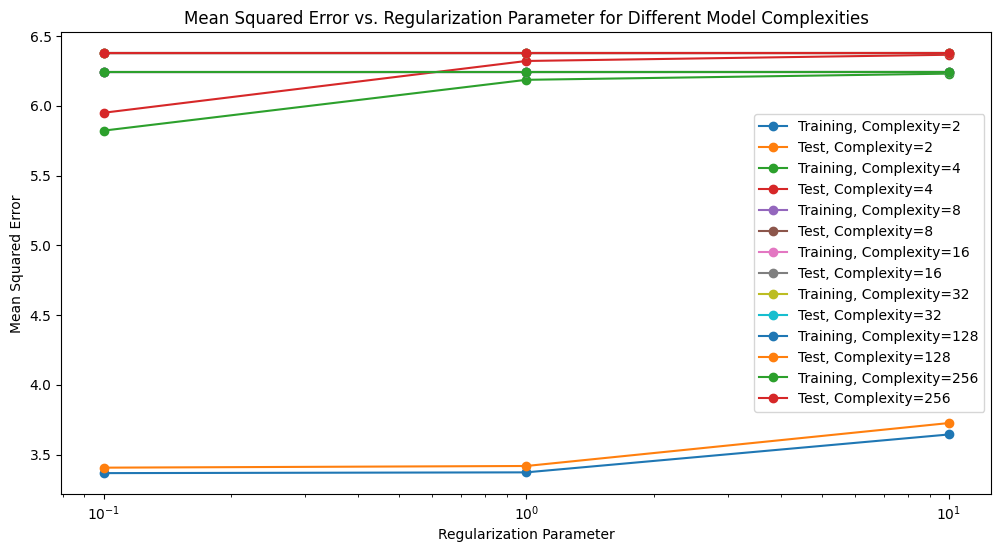

In [ ]:
train_errors = []
test_errors = []

for complexity in complexities:
    train_mses = []
    test_mses = []
    for reg_param in regularization_params:
        X_train_poly = polynomial_features(X_train, complexity)
        centers = np.linspace(X_train_poly.min(), X_train_poly.max(), complexity)
        width = (X_train_poly.max() - X_train_poly.min()) / complexity
        phi_train = gaussian_basis_functions(X_train_poly, centers, width)

        weights = ridge_regression(phi_train, y_train, reg_param)

        # Predictions for training data
        y_pred_train = phi_train @ weights

        # Mean Squared Error for training data
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        train_mses.append(mse_train)

        # Applying Gaussian basis functions to the polynomial features for testing data
        X_test_poly = polynomial_features(X_test, complexity)
        phi_test = gaussian_basis_functions(X_test_poly, centers, width)

        # Predictions for testing data
        y_pred_test = phi_test @ weights

        # Mean Squared Error for testing data
        mse_test = np.mean((y_test - y_pred_test) ** 2)
        test_mses.append(mse_test)

    train_errors.append(train_mses)
    test_errors.append(test_mses)

# Plotting mean squared errors
plt.figure(figsize=(12, 6))

for i, complexity in enumerate(complexities):
    plt.plot(regularization_params, train_errors[i], marker='o', label=f'Training, Complexity={complexity}')
    plt.plot(regularization_params, test_errors[i], marker='o', label=f'Test, Complexity={complexity}')

plt.xscale('log')
plt.xlabel('Regularization Parameter')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Regularization Parameter for Different Model Complexities')
plt.legend()
plt.show()


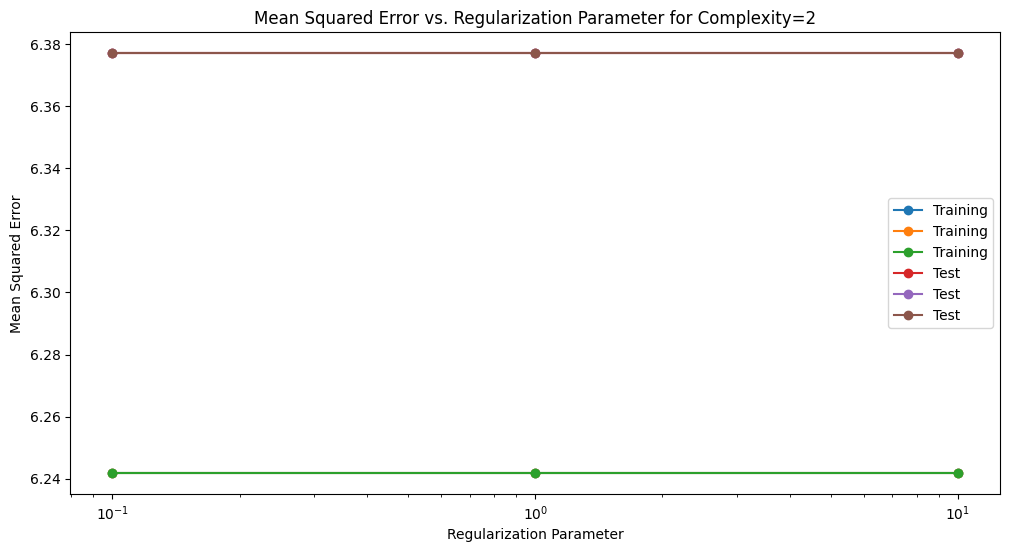

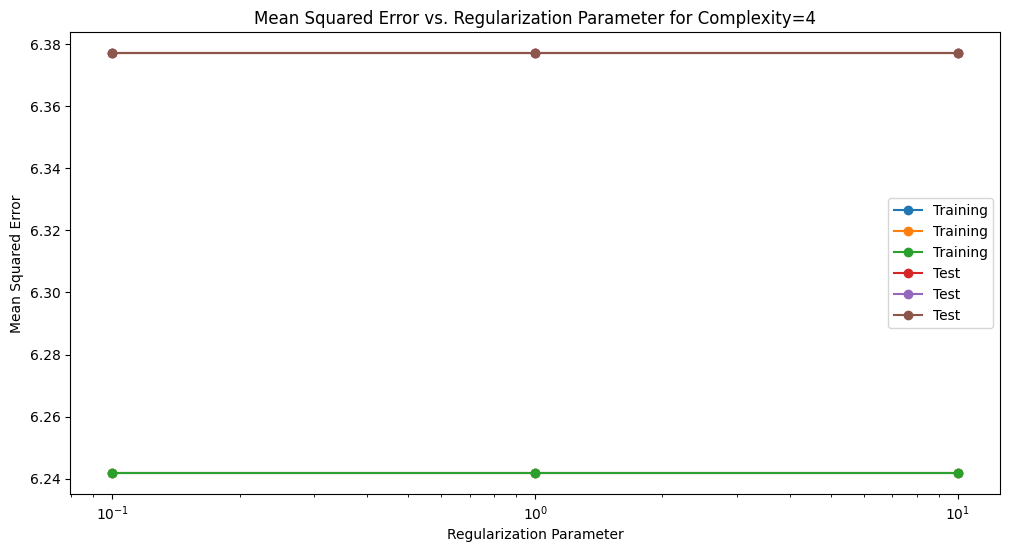

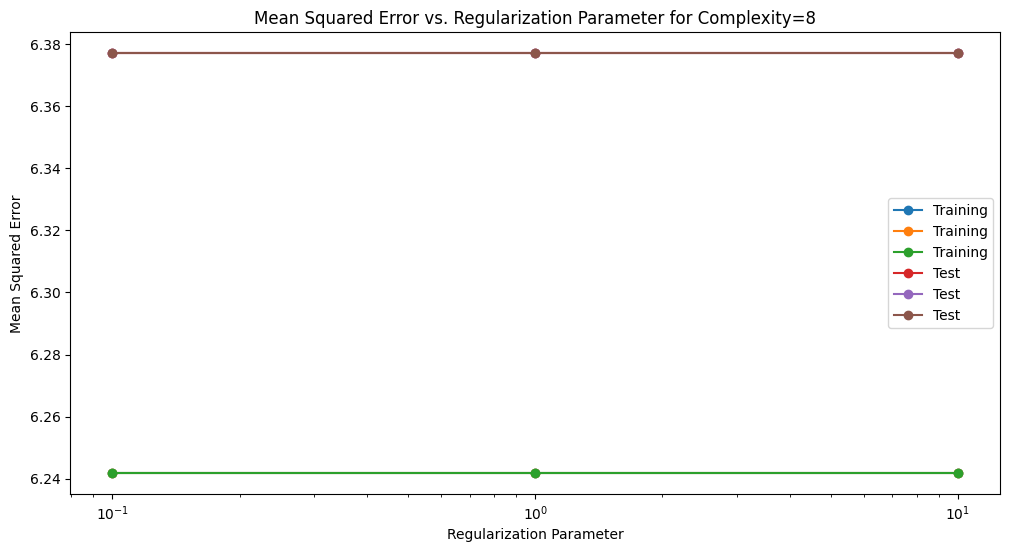

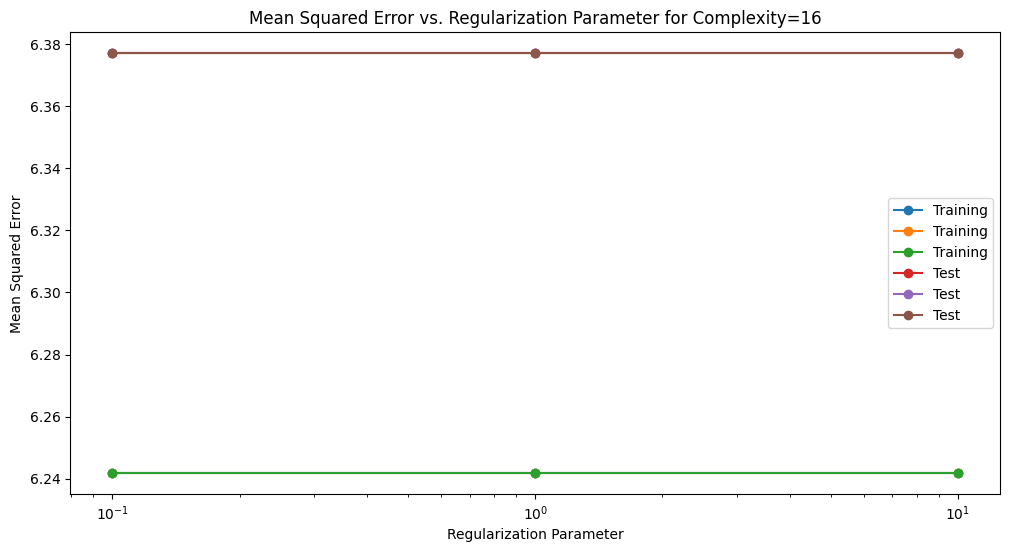

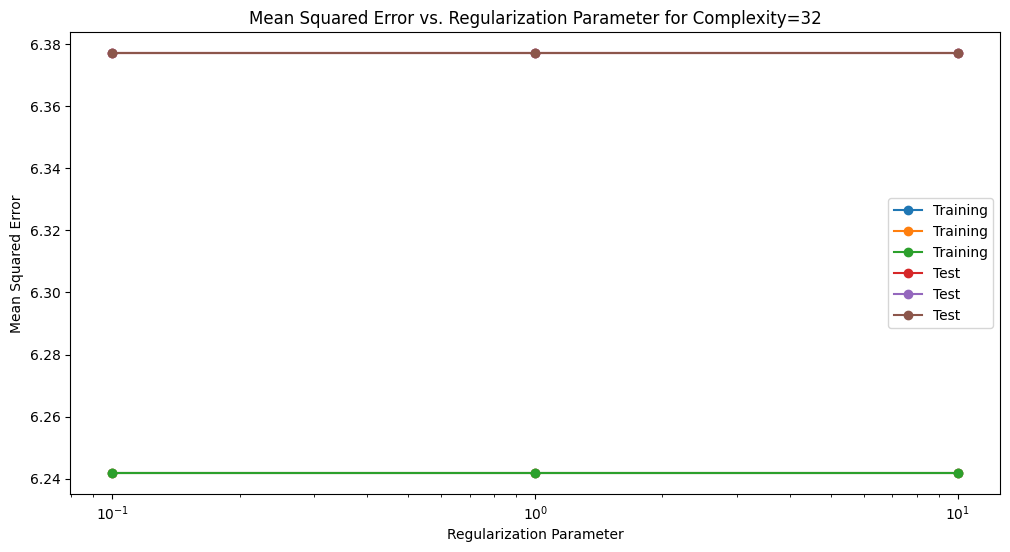

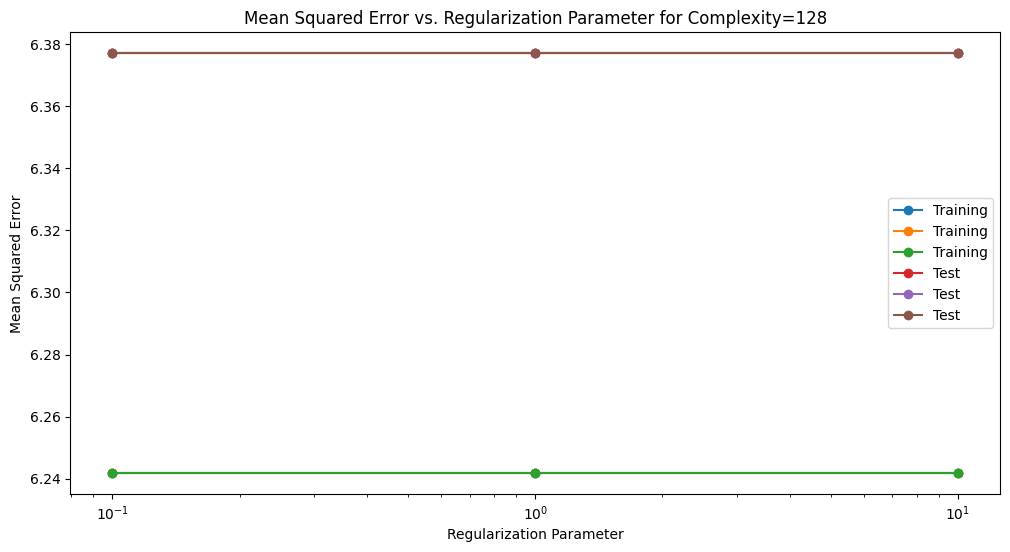

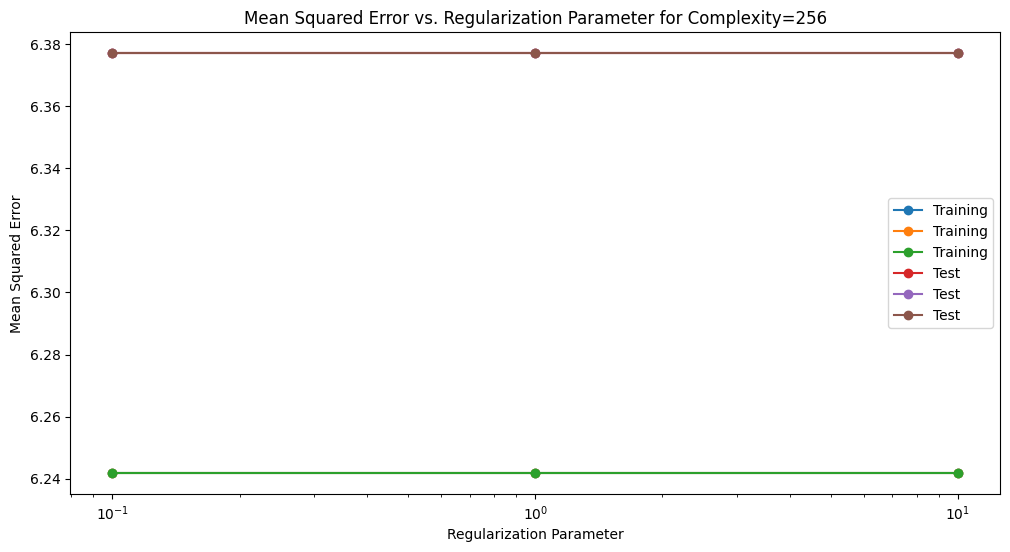

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume complexities and regularization_params are defined

for i, complexity in enumerate(complexities):
    train_errors = []
    test_errors = []

    for reg_param in regularization_params:
        # Rest of the code remains the same

        train_errors.append(train_mses)
        test_errors.append(test_mses)

    # Plotting mean squared errors for current complexity
    plt.figure(figsize=(12, 6))
    plt.plot(regularization_params, train_errors, marker='o', label=f'Training')
    plt.plot(regularization_params, test_errors, marker='o', label=f'Test')
    plt.xscale('log')
    plt.xlabel('Regularization Parameter')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Mean Squared Error vs. Regularization Parameter for Complexity={complexity}')
    plt.legend()
    plt.show()


#Updated code 05/11/2023

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MSE on training data: 3.701187545006493
MSE on test data: 3.7134223090442187


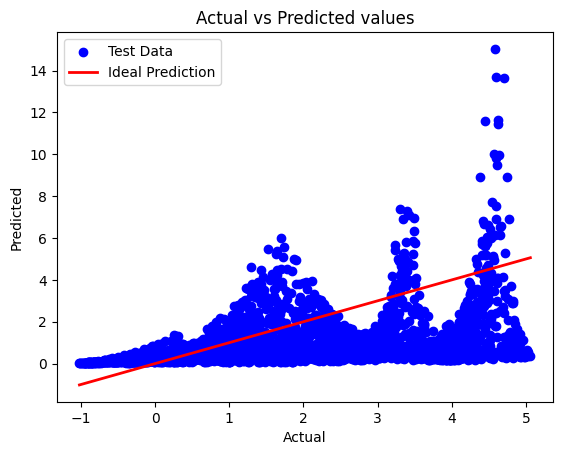

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Perform K-means clustering to determine s
k = 8  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_data)
cluster_distances = []
for i in range(k):
    cluster_points = x_data[kmeans.labels_ == i]
    distances = np.linalg.norm(cluster_points - kmeans.cluster_centers_[i], axis=1)
    cluster_distances.extend(distances)
s = np.std(cluster_distances)

# Gaussian basis function
def gaussian_basis(x, mu, s):
    return np.exp(-np.linalg.norm(x - mu, axis=1) / s)

# Create design matrix with Gaussian basis functions
def create_design_matrix(X, centers, s):
    phi = np.column_stack([gaussian_basis(X.values, mu, s) for mu in centers])
    return phi

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

# Calculate centers using K-means for training data
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

# Create design matrix for training and test data
phi_train = create_design_matrix(X_train, centers, s)
phi_test = create_design_matrix(X_test, centers, s)

# Perform linear regression using Gaussian basis functions
w = np.linalg.inv(phi_train.T @ phi_train) @ phi_train.T @ y_train

# Predictions
y_pred_train = phi_train @ w
y_pred_test = phi_test @ w

# Calculate MSE for training and test data
mse_train = np.mean((y_pred_train - y_train) ** 2)
mse_test = np.mean((y_pred_test - y_test) ** 2)

print("MSE on training data:", mse_train)
print("MSE on test data:", mse_test)

# Visualization (plotting the predicted vs actual values)
plt.scatter(y_test, y_pred_test, color='b', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs Predicted values')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

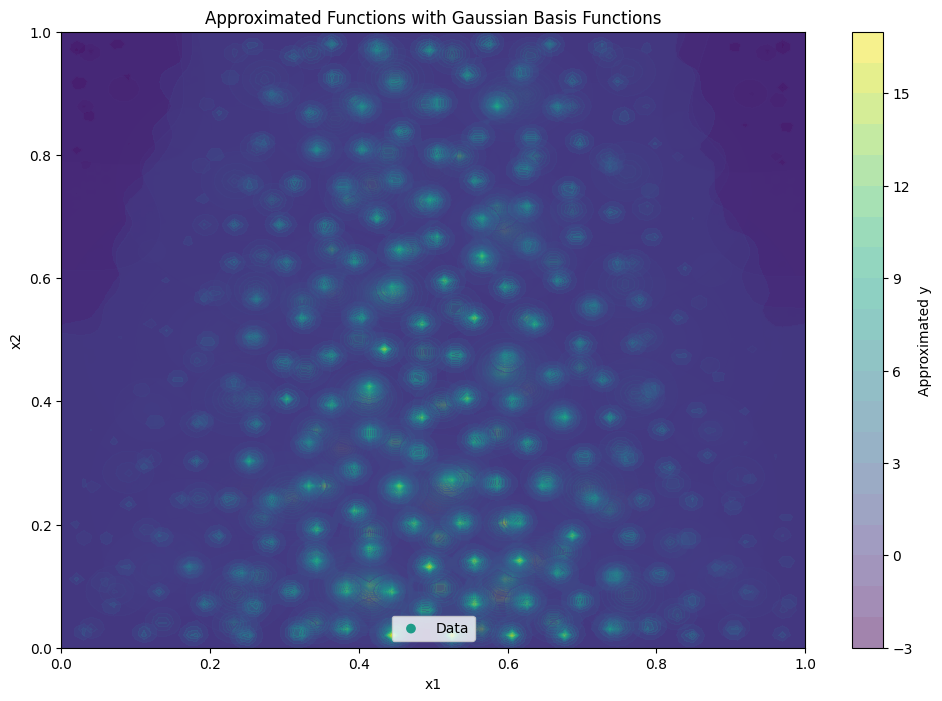

In [ ]:
# Model complexities (Number of basis functions)
model_complexities = [2, 4, 8, 16, 32, 128, 256]

# Plot approximated functions for different model complexities
plt.figure(figsize=(12, 8))
plt.scatter(x_data['x1'], x_data['x2'], c=y_data, cmap='viridis', label='Data')

for num_basis_functions in model_complexities:
    # Perform K-means clustering to determine centers and s
    kmeans = KMeans(n_clusters=num_basis_functions, random_state=42)
    kmeans.fit(x_data)
    centers = kmeans.cluster_centers_
    cluster_distances = []
    for i in range(num_basis_functions):
        cluster_points = x_data[kmeans.labels_ == i]
        distances = np.linalg.norm(cluster_points - centers[i], axis=1)
        cluster_distances.extend(distances)
    s = np.std(cluster_distances)

    # Create design matrix for Gaussian basis functions
    phi = np.column_stack([np.exp(-np.linalg.norm(x_data.values - mu, axis=1) / s) for mu in centers])

    # Perform linear regression using Gaussian basis functions
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_data

    # Predictions
    x_range = np.linspace(x_data['x1'].min(), x_data['x1'].max(), 100)
    y_range = np.linspace(x_data['x2'].min(), x_data['x2'].max(), 100)
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    xy_values = np.column_stack([x_grid.ravel(), y_grid.ravel()])
    phi_grid = np.column_stack([np.exp(-np.linalg.norm(xy_values - mu, axis=1) / s) for mu in centers])
    predictions = phi_grid @ w
    predictions_grid = predictions.reshape(x_grid.shape)

    # Plot the contour for the approximated function
    plt.contourf(x_grid, y_grid, predictions_grid, cmap='viridis', alpha=0.5, levels=20)

plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Approximated y')
plt.title('Approximated Functions with Gaussian Basis Functions')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

AttributeError: ignored

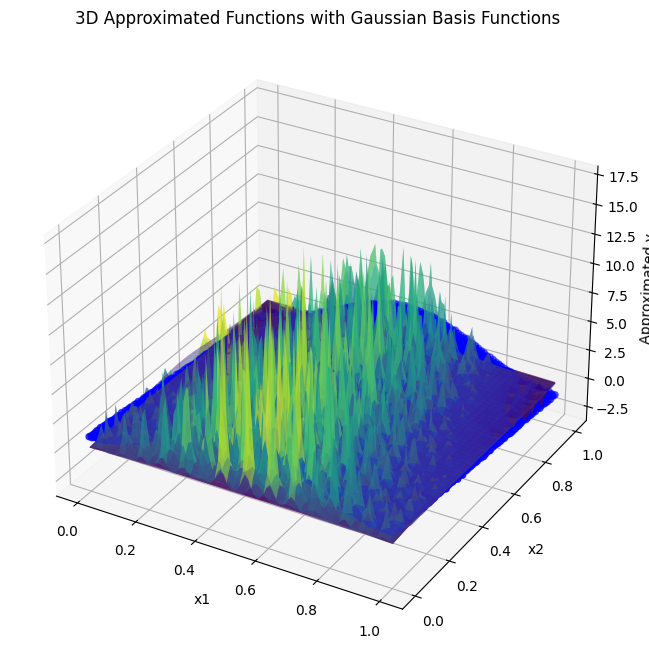

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Dataset 2 from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')
# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Model complexities (Number of basis functions)
model_complexities = [2, 4, 8, 16, 32, 128, 256]

# Plot 3D approximated functions for different model complexities
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points
ax.scatter(x_data['x1'], x_data['x2'], y_data, c='blue', marker='o', label='Data')

for num_basis_functions in model_complexities:
    # Perform K-means clustering to determine centers and s
    kmeans = KMeans(n_clusters=num_basis_functions, random_state=42)
    kmeans.fit(x_data)
    centers = kmeans.cluster_centers_
    cluster_distances = []
    for i in range(num_basis_functions):
        cluster_points = x_data[kmeans.labels_ == i]
        distances = np.linalg.norm(cluster_points - centers[i], axis=1)
        cluster_distances.extend(distances)
    s = np.std(cluster_distances)

    # Create design matrix for Gaussian basis functions
    phi = np.column_stack([np.exp(-np.linalg.norm(x_data.values - mu, axis=1) / s) for mu in centers])

    # Perform linear regression using Gaussian basis functions
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_data

    # Predictions
    x1_range = np.linspace(x_data['x1'].min(), x_data['x1'].max(), 100)
    x2_range = np.linspace(x_data['x2'].min(), x_data['x2'].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    xy_values = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    phi_grid = np.column_stack([np.exp(-np.linalg.norm(xy_values - mu, axis=1) / s) for mu in centers])
    predictions = phi_grid @ w
    predictions_grid = predictions.reshape(x1_grid.shape)

    # 3D plot for the approximated function
    ax.plot_surface(x1_grid, x2_grid, predictions_grid, cmap='viridis', alpha=0.5, label=f'M={num_basis_functions}')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Approximated y')
ax.set_title('3D Approximated Functions with Gaussian Basis Functions')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


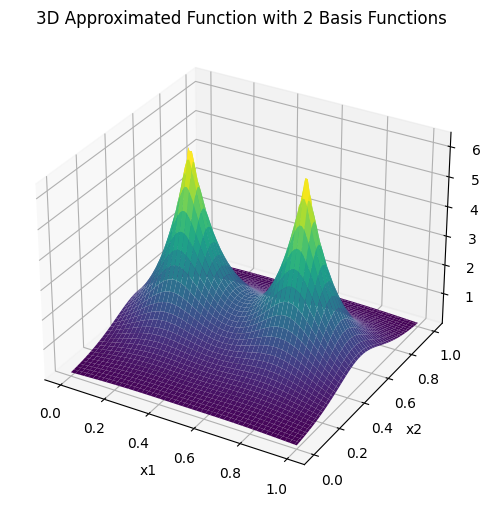

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


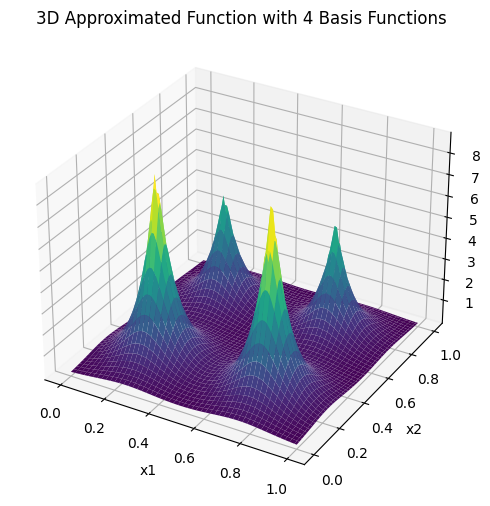

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


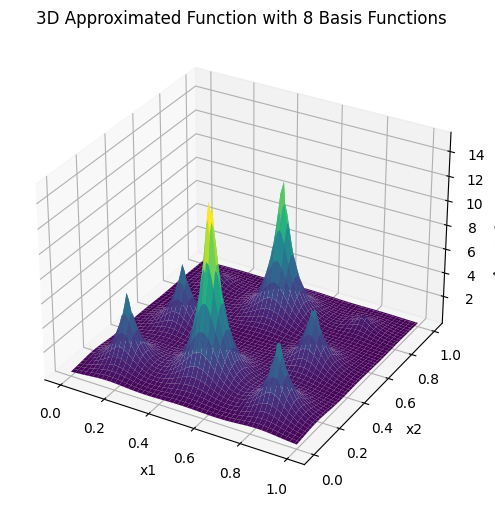

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


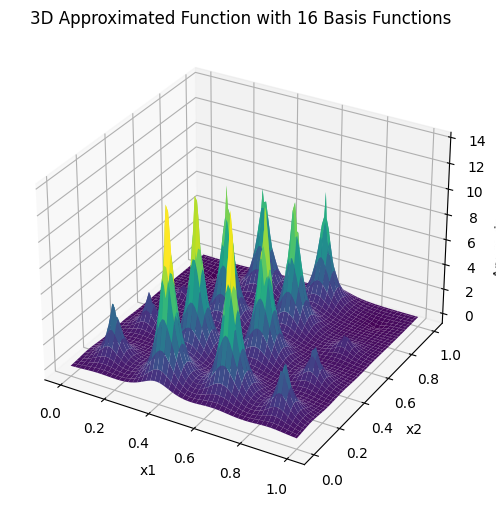

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


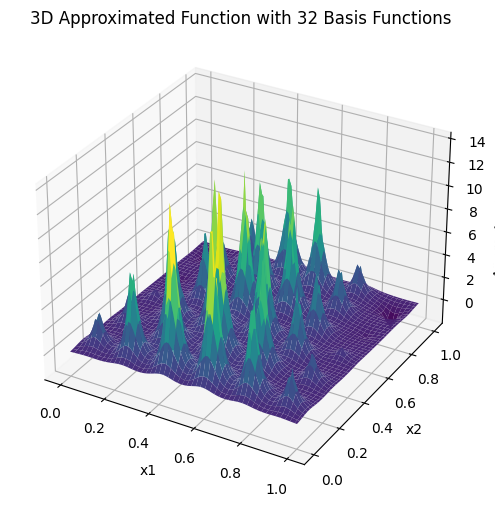

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


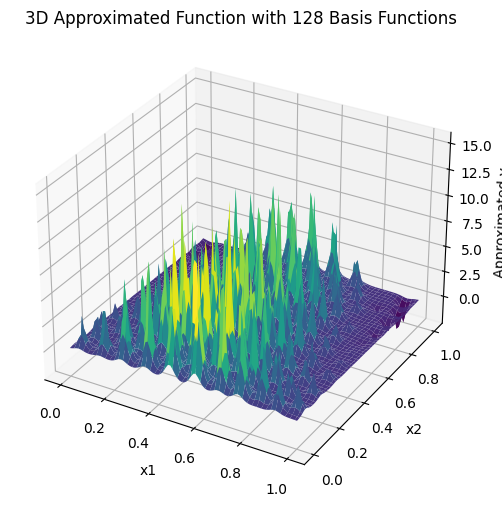

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


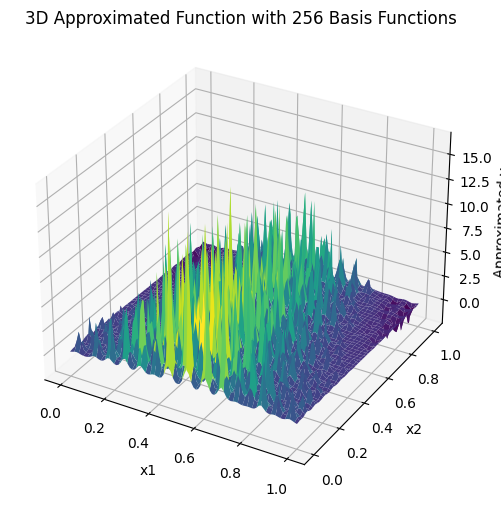

In [ ]:
# Plot individual 3D approximated functions for different model complexities
for num_basis_functions in model_complexities:
    # Perform K-means clustering to determine centers and s
    kmeans = KMeans(n_clusters=num_basis_functions, random_state=42)
    kmeans.fit(x_data)
    centers = kmeans.cluster_centers_
    cluster_distances = []
    for i in range(num_basis_functions):
        cluster_points = x_data[kmeans.labels_ == i]
        distances = np.linalg.norm(cluster_points - centers[i], axis=1)
        cluster_distances.extend(distances)
    s = np.std(cluster_distances)

    # Create design matrix for Gaussian basis functions
    phi = np.column_stack([np.exp(-np.linalg.norm(x_data.values - mu, axis=1) / s) for mu in centers])

    # Perform linear regression using Gaussian basis functions
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_data

    # Predictions
    x1_range = np.linspace(x_data['x1'].min(), x_data['x1'].max(), 100)
    x2_range = np.linspace(x_data['x2'].min(), x_data['x2'].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    xy_values = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    phi_grid = np.column_stack([np.exp(-np.linalg.norm(xy_values - mu, axis=1) / s) for mu in centers])
    predictions = phi_grid @ w
    predictions_grid = predictions.reshape(x1_grid.shape)

    # 3D plot for the approximated function
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1_grid, x2_grid, predictions_grid, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Approximated y')
    ax.set_title(f'3D Approximated Function with {num_basis_functions} Basis Functions')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


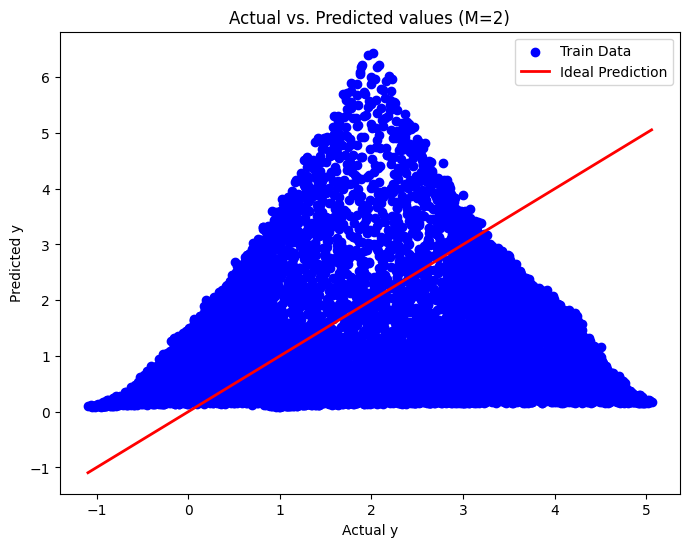

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


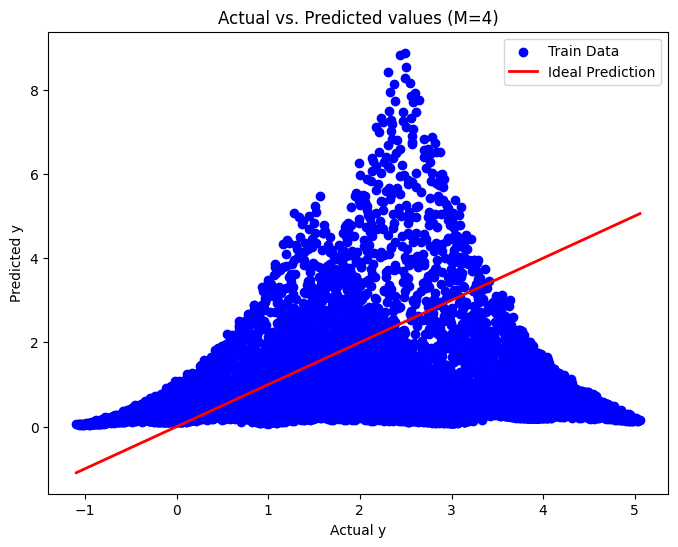

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


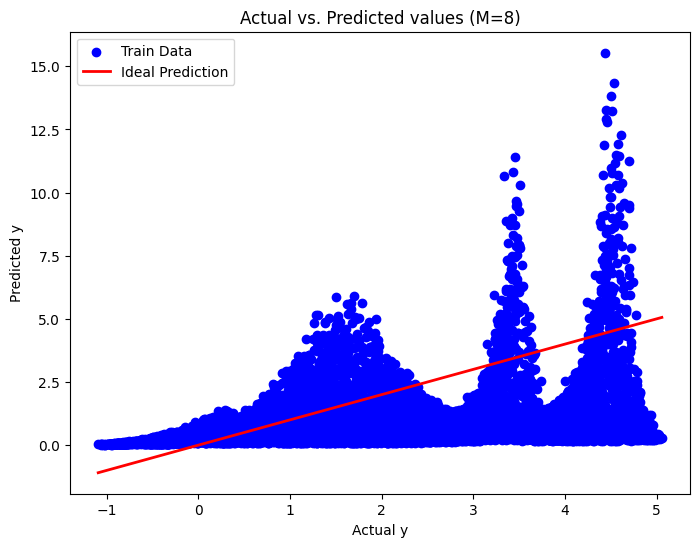

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


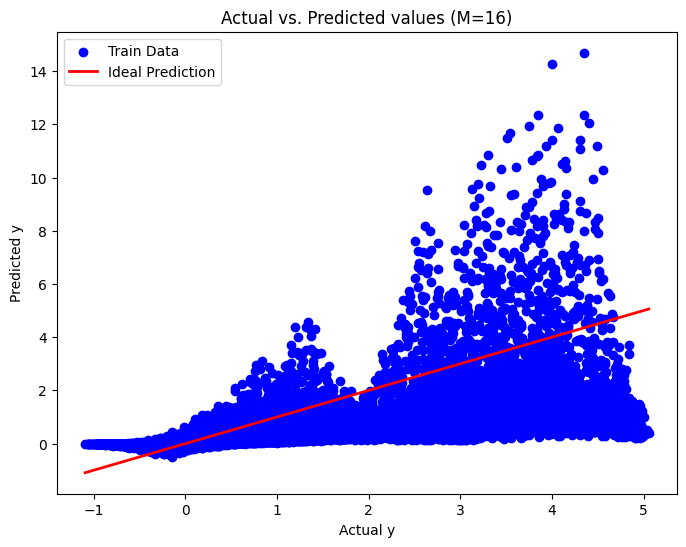

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


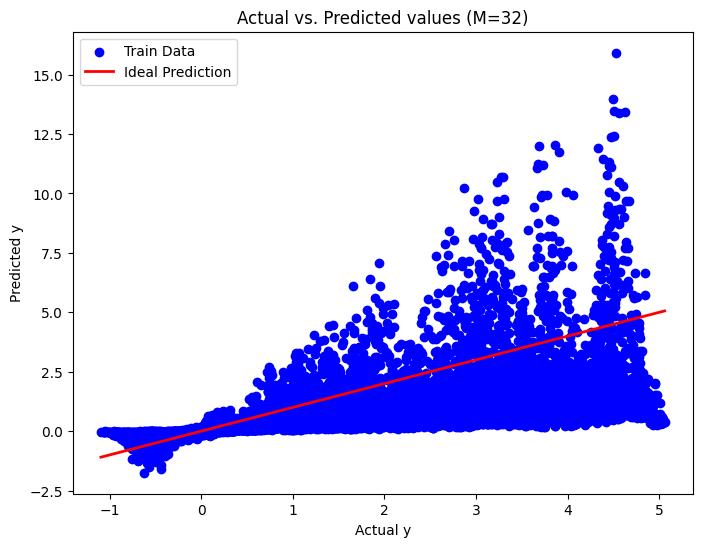

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


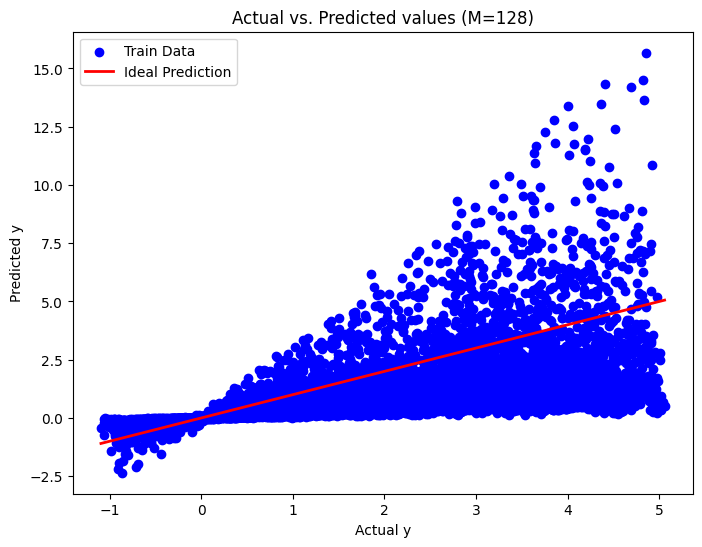

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


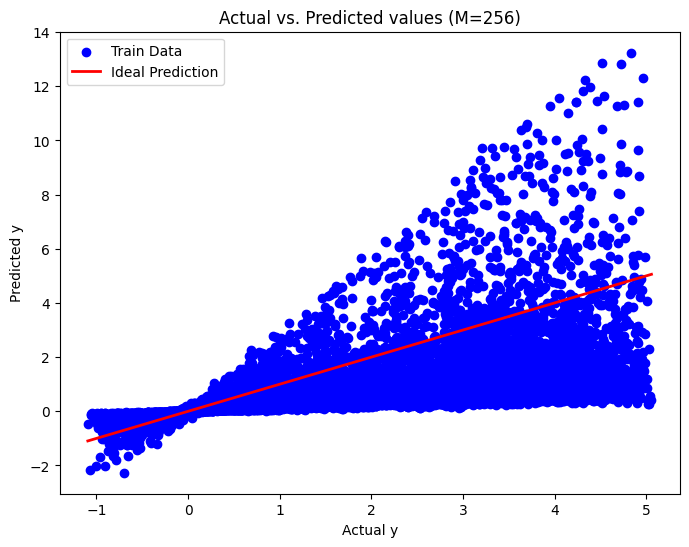

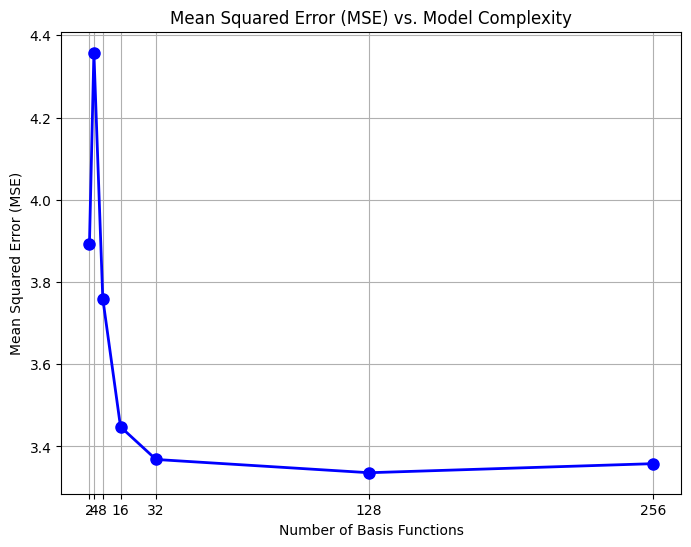

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Model complexities (Number of basis functions)
model_complexities = [2, 4, 8, 16, 32, 128, 256]

# Store MSE values for each model complexity
mse_values = []

# Compute and plot approximated function for train data for each model complexity
for num_basis_functions in model_complexities:
    # Perform K-means clustering to determine centers and s
    kmeans = KMeans(n_clusters=num_basis_functions, random_state=42)
    kmeans.fit(x_data)
    centers = kmeans.cluster_centers_
    cluster_distances = []
    for i in range(num_basis_functions):
        cluster_points = x_data[kmeans.labels_ == i]
        distances = np.linalg.norm(cluster_points - centers[i], axis=1)
        cluster_distances.extend(distances)
    s = np.std(cluster_distances)

    # Create design matrix for Gaussian basis functions
    phi = np.column_stack([np.exp(-np.linalg.norm(x_data.values - mu, axis=1) / s) for mu in centers])

    # Perform linear regression using Gaussian basis functions
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_data

    # Predictions on the training data
    predictions = phi @ w

    # Calculate MSE for the training data
    mse = mean_squared_error(y_data, predictions)
    mse_values.append(mse)

    # Visualization (scatter plot of actual vs. predicted values)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_data, predictions, c='b', marker='o', label='Train Data')
    plt.plot([min(y_data), max(y_data)], [min(y_data), max(y_data)], color='red', linewidth=2, label='Ideal Prediction')
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.title(f'Actual vs. Predicted values (M={num_basis_functions})')
    plt.legend()
    plt.show()

# Plot MSE values for different model complexities
plt.figure(figsize=(8, 6))
plt.plot(model_complexities, mse_values, marker='o', color='b', linewidth=2, markersize=8)
plt.xlabel('Number of Basis Functions')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) vs. Model Complexity')
plt.xticks(model_complexities)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: ignored

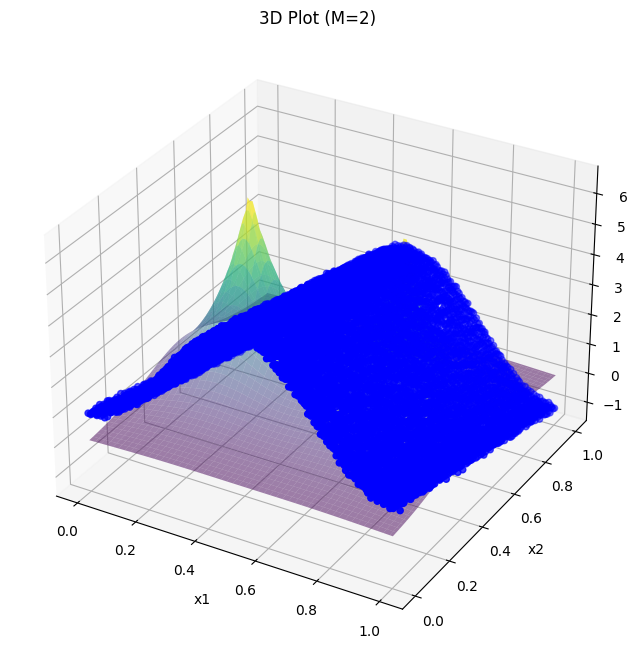

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

# Model complexities (Number of basis functions)
model_complexities = [2, 4, 8, 16, 32, 128, 256]

# Plot 3D actual data points and predicted surface for each model complexity
for num_basis_functions in model_complexities:
    # Perform K-means clustering to determine centers and s
    kmeans = KMeans(n_clusters=num_basis_functions, random_state=42)
    kmeans.fit(x_data)
    centers = kmeans.cluster_centers_
    cluster_distances = []
    for i in range(num_basis_functions):
        cluster_points = x_data[kmeans.labels_ == i]
        distances = np.linalg.norm(cluster_points - centers[i], axis=1)
        cluster_distances.extend(distances)
    s = np.std(cluster_distances)

    # Create design matrix for Gaussian basis functions
    phi = np.column_stack([np.exp(-np.linalg.norm(x_data.values - mu, axis=1) / s) for mu in centers])

    # Perform linear regression using Gaussian basis functions
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_data

    # Predictions
    x1_range = np.linspace(x_data['x1'].min(), x_data['x1'].max(), 100)
    x2_range = np.linspace(x_data['x2'].min(), x_data['x2'].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    xy_values = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    phi_grid = np.column_stack([np.exp(-np.linalg.norm(xy_values - mu, axis=1) / s) for mu in centers])
    predictions = phi_grid @ w
    predictions_grid = predictions.reshape(x1_grid.shape)

    # 3D plot for actual data points
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_data['x1'], x_data['x2'], y_data, c='blue', marker='o', label='Actual Data')

    # 3D plot for predicted surface
    ax.plot_surface(x1_grid, x2_grid, predictions_grid, cmap='viridis', alpha=0.5, label=f'Predicted Surface (M={num_basis_functions})')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title(f'3D Plot (M={num_basis_functions})')
    ax.legend()
    plt.show()

    # Calculate MSE for the training data
    predictions_train = phi @ w
    mse_train = mean_squared_error(y_data, predictions_train)
    print(f'Model Complexity (M={num_basis_functions}): Mean Squared Error (MSE) on Train Data: {mse_train:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


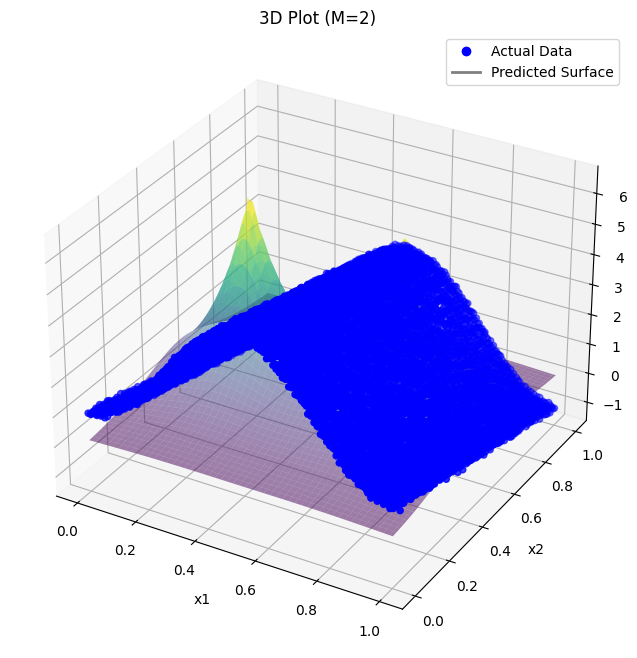

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


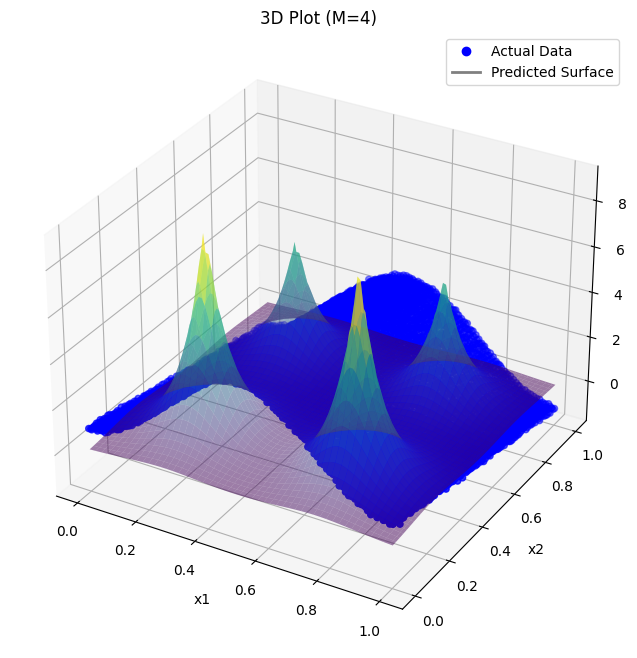

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


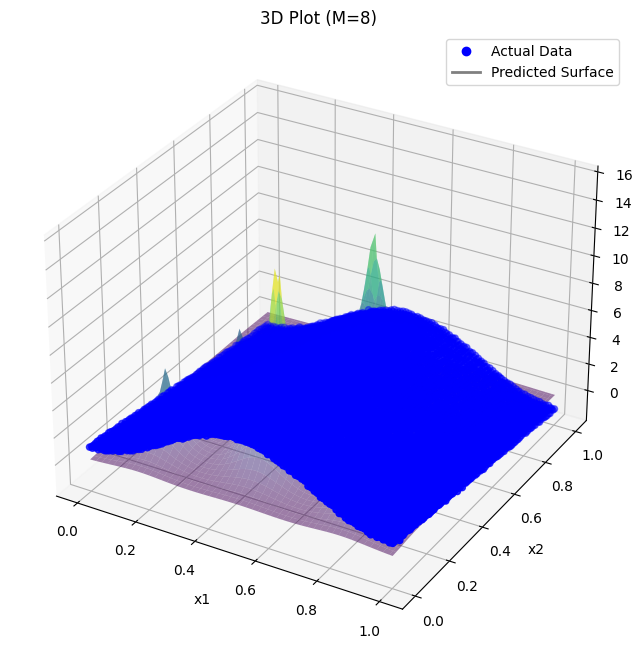

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


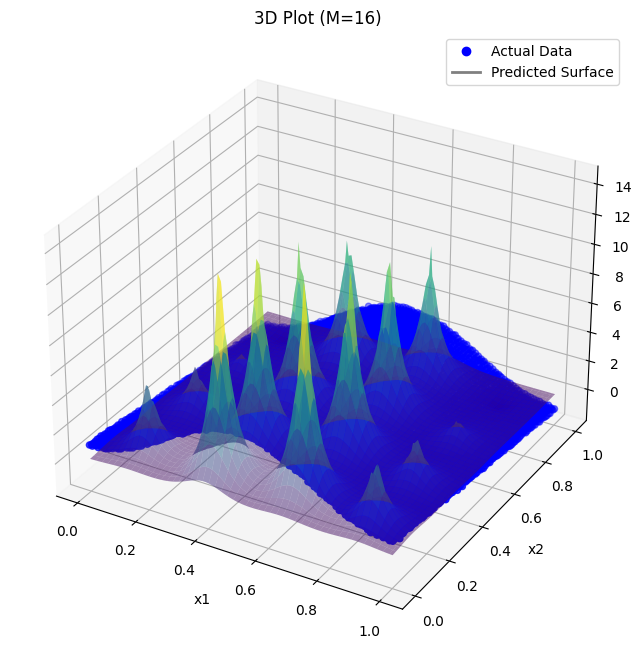

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


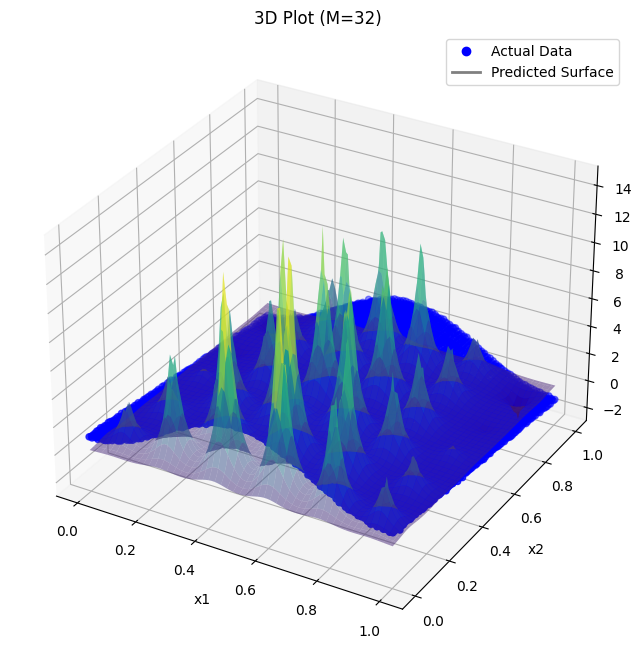

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


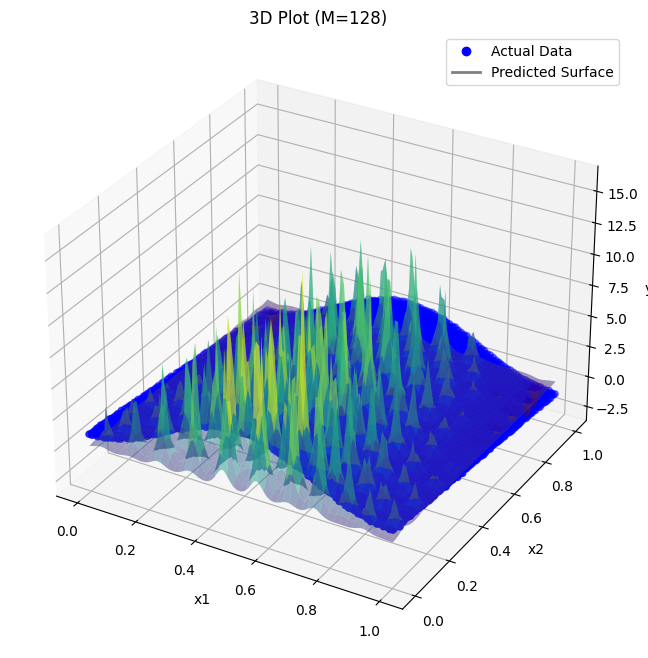

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


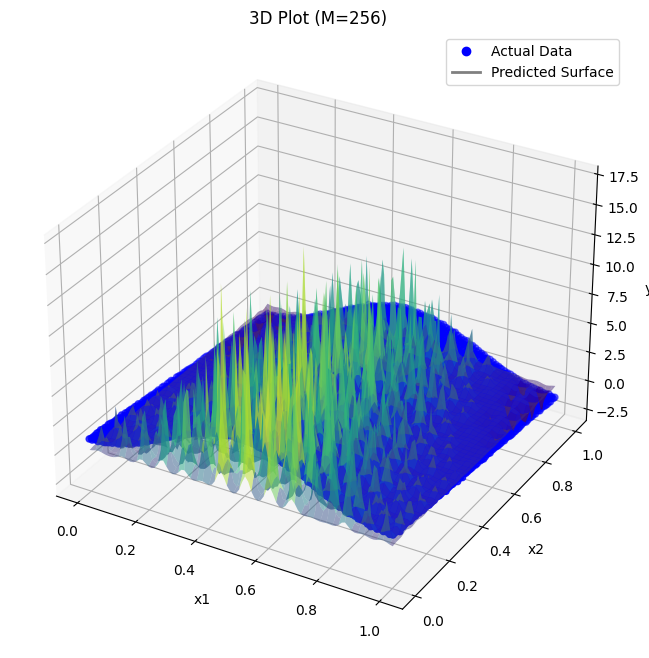

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Model complexities (Number of basis functions)
model_complexities = [2, 4, 8, 16, 32, 128, 256]

# Plot 3D actual data points and predicted surface for each model complexity
for num_basis_functions in model_complexities:
    # Perform K-means clustering to determine centers and s
    kmeans = KMeans(n_clusters=num_basis_functions, random_state=42)
    kmeans.fit(x_data)
    centers = kmeans.cluster_centers_
    cluster_distances = []
    for i in range(num_basis_functions):
        cluster_points = x_data[kmeans.labels_ == i]
        distances = np.linalg.norm(cluster_points - centers[i], axis=1)
        cluster_distances.extend(distances)
    s = np.std(cluster_distances)

    # Create design matrix for Gaussian basis functions
    phi = np.column_stack([np.exp(-np.linalg.norm(x_data.values - mu, axis=1) / s) for mu in centers])

    # Perform linear regression using Gaussian basis functions
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_data

    # Predictions
    x1_range = np.linspace(x_data['x1'].min(), x_data['x1'].max(), 100)
    x2_range = np.linspace(x_data['x2'].min(), x_data['x2'].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    xy_values = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    phi_grid = np.column_stack([np.exp(-np.linalg.norm(xy_values - mu, axis=1) / s) for mu in centers])
    predictions = phi_grid @ w
    predictions_grid = predictions.reshape(x1_grid.shape)

    # 3D plot for actual data points
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_data['x1'], x_data['x2'], y_data, c='blue', marker='o', label='Actual Data')

    # 3D plot for predicted surface
    ax.plot_surface(x1_grid, x2_grid, predictions_grid, cmap='viridis', alpha=0.5)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title(f'3D Plot (M={num_basis_functions})')

    # Create custom legend
    legend_elements = [Line2D([0], [0], color='b', marker='o', linestyle='', label='Actual Data'),
                       Line2D([0], [0], color='gray', linestyle='-', linewidth=2, label='Predicted Surface')]

    ax.legend(handles=legend_elements, loc='upper right')

    plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D


# Model complexities (Number of basis functions)
model_complexities = [2, 4, 8, 16, 32, 128, 256]

# Plot 3D actual data points and predicted surface for each model complexity
for num_basis_functions in model_complexities:
    # Perform K-means clustering to determine centers and cluster distances as s
    kmeans = KMeans(n_clusters=num_basis_functions, random_state=42)
    kmeans.fit(x_data)
    centers = kmeans.cluster_centers_
    cluster_distances = []
    for i in range(num_basis_functions):
        cluster_points = x_data[kmeans.labels_ == i]
        distances = np.linalg.norm(cluster_points - centers[i], axis=1)
        cluster_distances.extend(distances)
    s = np.array(cluster_distances)

    # Create design matrix for Gaussian basis functions
    phi = np.column_stack([np.exp(-np.linalg.norm(x_data.values - mu, axis=1) / s) for mu in centers])

    # Perform linear regression using Gaussian basis functions
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_data

    # Predictions
    x1_range = np.linspace(x_data['x1'].min(), x_data['x1'].max(), 100)
    x2_range = np.linspace(x_data['x2'].min(), x_data['x2'].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    xy_values = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    phi_grid = np.column_stack([np.exp(-np.linalg.norm(xy_values - mu, axis=1) / s) for mu in centers])
    predictions = phi_grid @ w
    predictions_grid = predictions.reshape(x1_grid.shape)

    # 3D plot for actual data points
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_data['x1'], x_data['x2'], y_data, c='blue', marker='o', label='Actual Data')

    # 3D plot for predicted surface
    ax.plot_surface(x1_grid, x2_grid, predictions_grid, cmap='viridis', alpha=0.5)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title(f'3D Plot (M={num_basis_functions})')

    # Create custom legend
    legend_elements = [Line2D([0], [0], color='b', marker='o', linestyle='', label='Actual Data'),
                       Line2D([0], [0], color='gray', linestyle='-', linewidth=2, label='Predicted Surface')]

    ax.legend(handles=legend_elements, loc='upper right')

    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Model complexities (Number of basis functions)
model_complexities = [2, 4, 8, 16, 32, 128, 256]

# Plot 3D actual data points and predicted surface for each model complexity
for num_basis_functions in model_complexities:
    # Perform K-means clustering to determine centers and cluster distances as s
    kmeans = KMeans(n_clusters=num_basis_functions, random_state=42)
    kmeans.fit(x_data)
    centers = kmeans.cluster_centers_
    cluster_distances = []
    for i in range(num_basis_functions):
        cluster_points = x_data[kmeans.labels_ == i]
        distances = np.linalg.norm(cluster_points - centers[i], axis=1)
        cluster_distances.extend(distances)
    s = np.array(cluster_distances).reshape(-1, 1)

    # Create design matrix for Gaussian basis functions
    phi = np.column_stack([np.exp(-np.linalg.norm(x_data.values - mu, axis=1) / s) for mu in centers])

    # Perform linear regression using Gaussian basis functions
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_data

    # Predictions
    x1_range = np.linspace(x_data['x1'].min(), x_data['x1'].max(), 100)
    x2_range = np.linspace(x_data['x2'].min(), x_data['x2'].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    xy_values = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    phi_grid = np.column_stack([np.exp(-np.linalg.norm(xy_values - mu, axis=1) / s) for mu in centers])
    predictions = phi_grid @ w
    predictions_grid = predictions.reshape(x1_grid.shape)

    # 3D plot for actual data points
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_data['x1'], x_data['x2'], y_data, c='blue', marker='o', label='Actual Data')

    # 3D plot for predicted surface
    ax.plot_surface(x1_grid, x2_grid, predictions_grid, cmap='viridis', alpha=0.5)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title(f'3D Plot (M={num_basis_functions})')

    # Create custom legend
    legend_elements = [Line2D([0], [0], color='b', marker='o', linestyle='', label='Actual Data'),
                       Line2D([0], [0], color='gray', linestyle='-', linewidth=2, label='Predicted Surface')]

    ax.legend(handles=legend_elements, loc='upper right')

    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


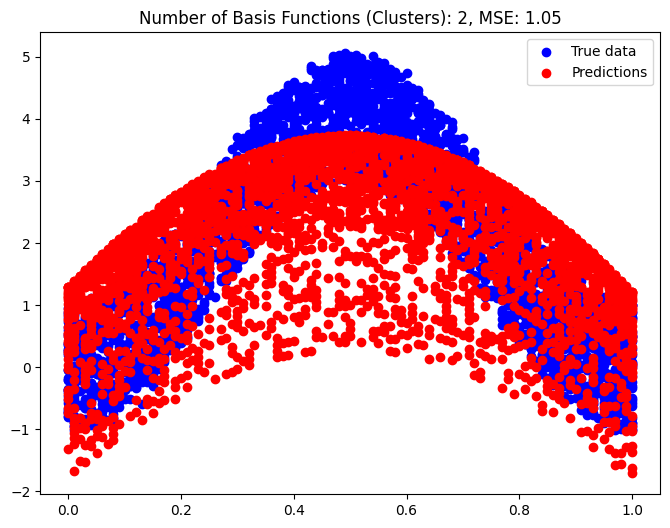

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


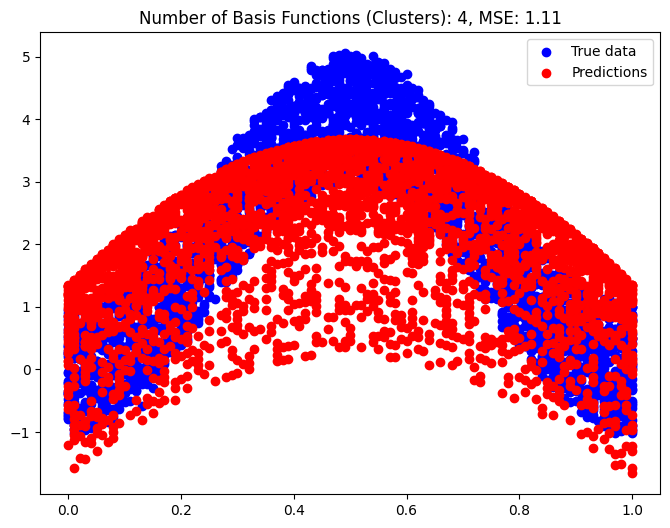

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


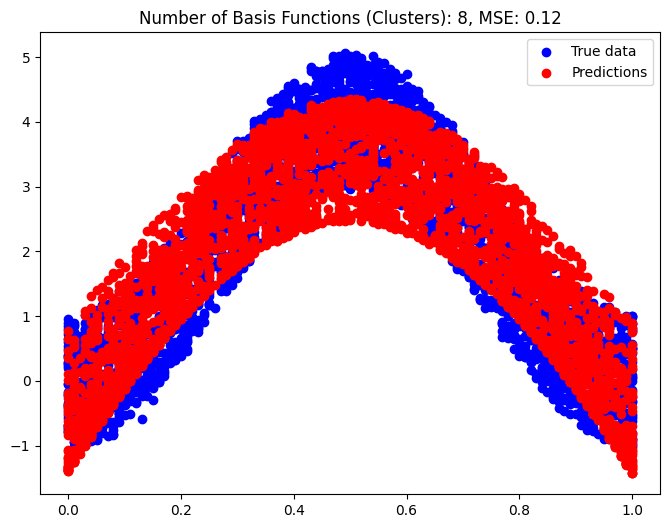

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


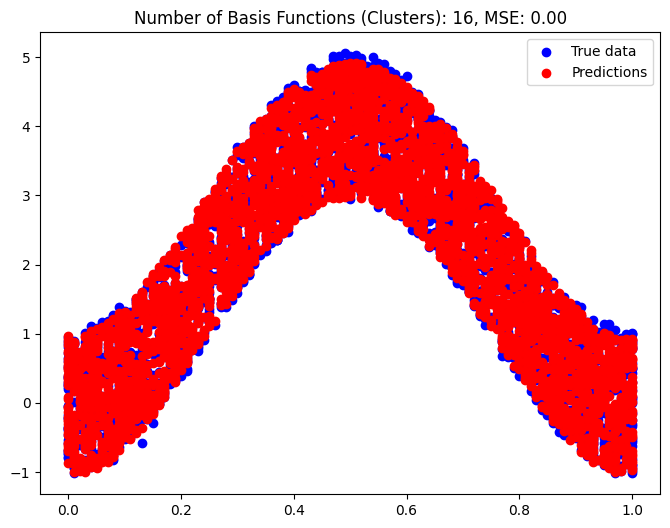

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


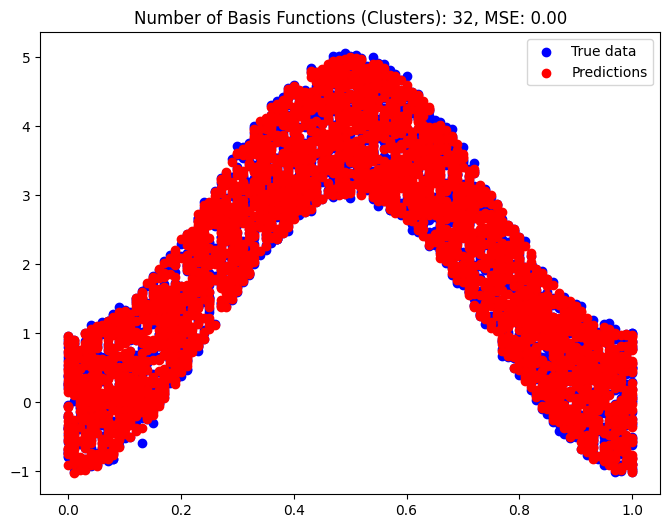

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


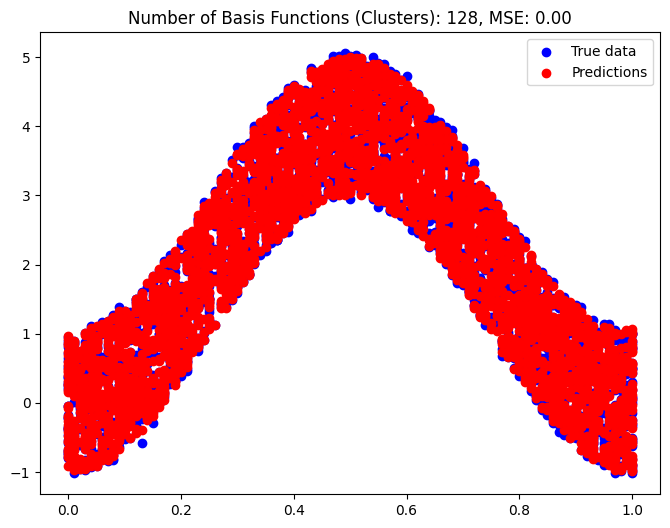

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


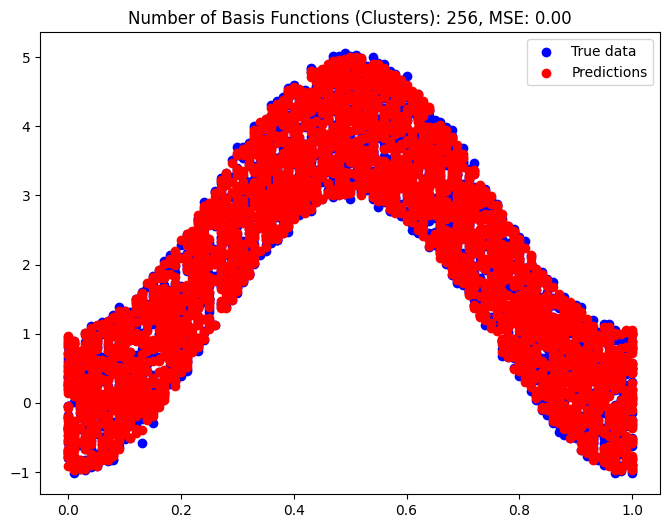

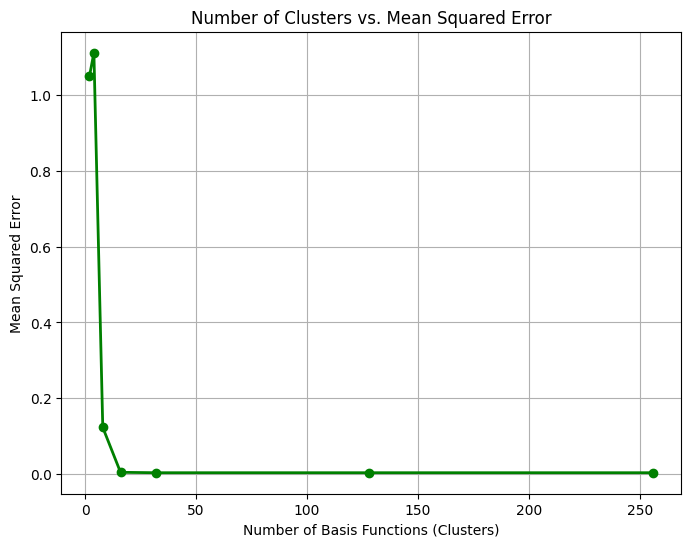

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset 2 from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Model complexities (Number of basis functions)
complexity_values = [2, 4, 8, 16, 32, 128, 256]

mse_values = []

# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    # Step 1: Divide Data into Training and Test Sets
    X2_train, X2_test, y2_train, y2_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

    # Step 2: Apply K-means Clustering for Gaussian Basis Functions
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2_train)
    cluster_centers = kmeans.cluster_centers_

    # Step 3: Train Linear Regression Models with Gaussian Basis Functions
    def gaussian_basis_functions(X, centers, width=1):
        return np.exp(-np.square(np.linalg.norm(X[:, np.newaxis] - centers, axis=2)) / (2 * width ** 2))

    # Compute Gaussian basis functions for training data
    phi_train = gaussian_basis_functions(X2_train.values, cluster_centers)

    # Train linear regression model
    model = LinearRegression()
    model.fit(phi_train, y2_train)

    # Compute Gaussian basis functions for test data
    phi_test = gaussian_basis_functions(X2_test.values, cluster_centers)

    # Make predictions
    predictions = model.predict(phi_test)

    # Calculate mean squared error
    mse = mean_squared_error(y2_test, predictions)
    mse_values.append(mse)

    # Plot the approximated function
    plt.figure(figsize=(8, 6))
    plt.scatter(X2_test['x1'], y2_test, color='blue', label='True data')
    plt.scatter(X2_test['x1'], predictions, color='red', label='Predictions')
    plt.title(f'Number of Basis Functions (Clusters): {num_clusters}, MSE: {mse:.2f}')
    plt.legend()
    plt.show()

# Plot MSE values against model complexity (number of clusters)
plt.figure(figsize=(8, 6))
plt.plot(complexity_values, mse_values, marker='o', color='green', linestyle='-', linewidth=2)
plt.xlabel('Number of Basis Functions (Clusters)')
plt.ylabel('Mean Squared Error')
plt.title('Number of Clusters vs. Mean Squared Error')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


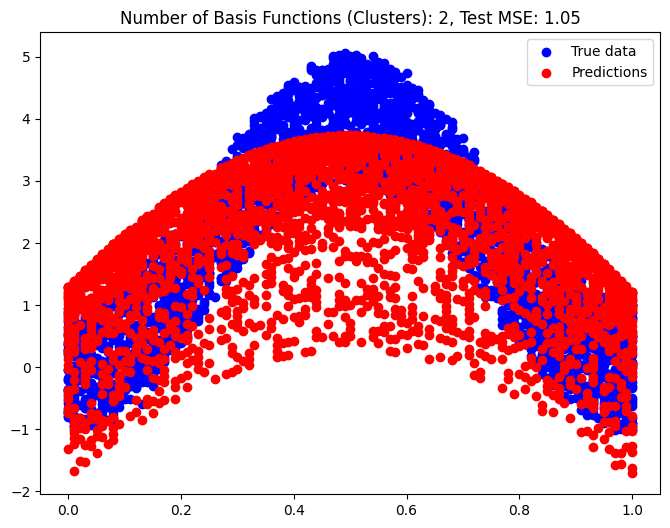

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


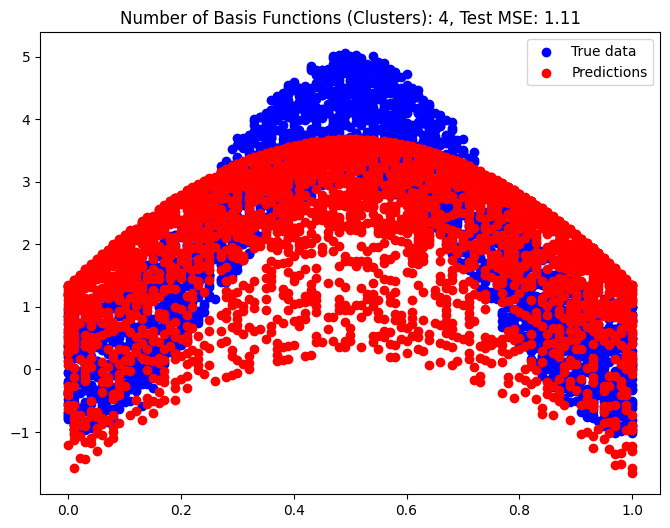

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


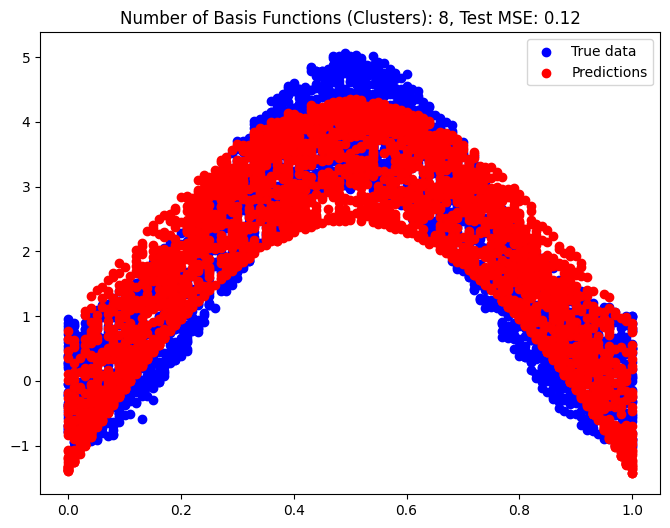

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


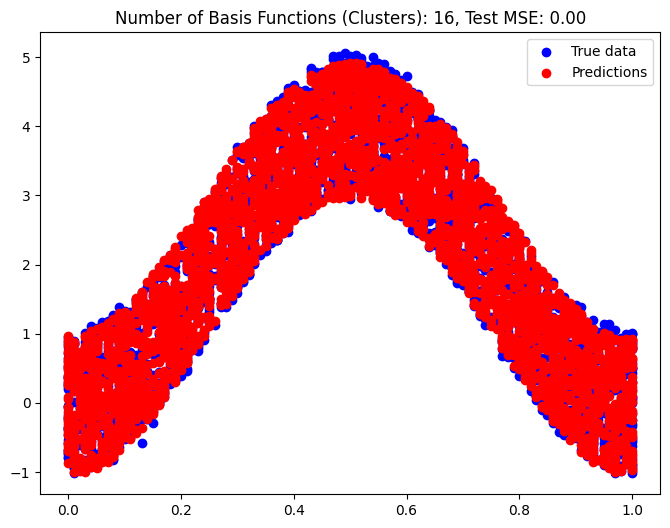

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


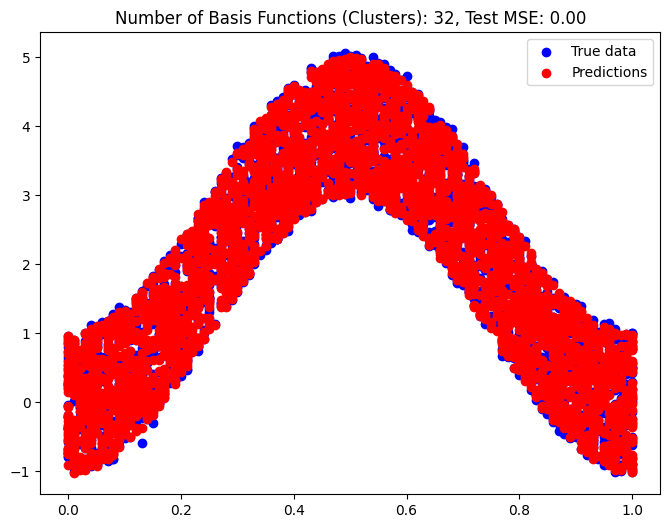

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


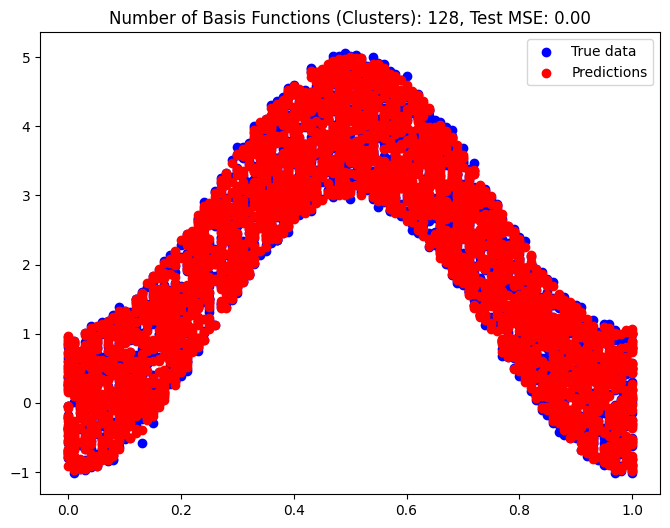

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


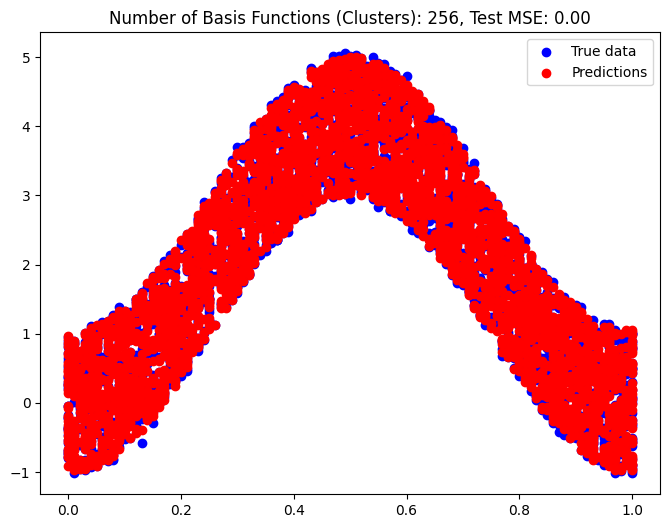

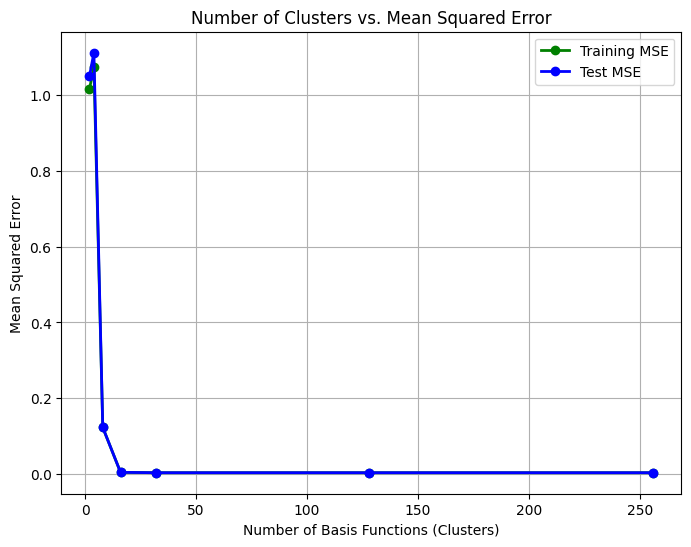

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset 2 from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Model complexities (Number of basis functions)
complexity_values = [2, 4, 8, 16, 32, 128, 256]

mse_train_values = []
mse_test_values = []

# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    # Step 1: Divide Data into Training and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

    # Step 2: Apply K-means Clustering for Gaussian Basis Functions
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_train)
    cluster_centers = kmeans.cluster_centers_

    # Step 3: Train Linear Regression Models with Gaussian Basis Functions
    def gaussian_basis_functions(X, centers, width=1):
        return np.exp(-np.square(np.linalg.norm(X[:, np.newaxis] - centers, axis=2)) / (2 * width ** 2))

    # Compute Gaussian basis functions for training data
    phi_train = gaussian_basis_functions(X_train.values, cluster_centers)

    # Train linear regression model
    model = LinearRegression()
    model.fit(phi_train, y_train)

    # Compute Gaussian basis functions for test data
    phi_test = gaussian_basis_functions(X_test.values, cluster_centers)

    # Make predictions for training and test data
    predictions_train = model.predict(phi_train)
    predictions_test = model.predict(phi_test)

    # Calculate mean squared error for training and test data
    mse_train = mean_squared_error(y_train, predictions_train)
    mse_test = mean_squared_error(y_test, predictions_test)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

    # Plot the approximated function for test data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['x1'], y_test, color='blue', label='True data')
    plt.scatter(X_test['x1'], predictions_test, color='red', label='Predictions')
    plt.title(f'Number of Basis Functions (Clusters): {num_clusters}, Test MSE: {mse_test:.2f}')
    plt.legend()
    plt.show()

# Plot MSE values against model complexity (number of clusters) for both training and test data
plt.figure(figsize=(8, 6))
plt.plot(complexity_values, mse_train_values, marker='o', color='green', linestyle='-', linewidth=2, label='Training MSE')
plt.plot(complexity_values, mse_test_values, marker='o', color='blue', linestyle='-', linewidth=2, label='Test MSE')
plt.xlabel('Number of Basis Functions (Clusters)')
plt.ylabel('Mean Squared Error')
plt.title('Number of Clusters vs. Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset 2 from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Model complexities (Number of basis functions)
complexity_values = [2, 4, 8, 16, 32, 128, 256]

mse_train_values = []
mse_test_values = []

# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    # Step 1: Divide Data into Training and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

    # Step 2: Apply K-means Clustering for Gaussian Basis Functions
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_train)
    cluster_centers = kmeans.cluster_centers_

    # Step 3: Train Linear Regression Models with Gaussian Basis Functions
    def gaussian_basis_functions(X, centers, width=1):
        return np.exp(-np.square(np.linalg.norm(X[:, np.newaxis] - centers, axis=2)) / (2 * width ** 2))

    # Compute Gaussian basis functions for training data
    phi_train = gaussian_basis_functions(X_train.values, cluster_centers)

    # Train linear regression model
    model = LinearRegression()
    model.fit(phi_train, y_train)

    # Compute Gaussian basis functions for test data
    phi_test = gaussian_basis_functions(X_test.values, cluster_centers)

    # Make predictions for training and test data
    predictions_train = model.predict(phi_train)
    predictions_test = model.predict(phi_test)

    # Calculate mean squared error for training and test data
    mse_train = mean_squared_error(y_train, predictions_train)
    mse_test = mean_squared_error(y_test, predictions_test)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

    # Plot the approximated function for test data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['x1'], y_test, color='blue', label='True data')
    plt.scatter(X_test['x1'], predictions_test, color='red', label='Predictions')
    plt.title(f'Number of Basis Functions (Clusters): {num_clusters}, Test MSE: {mse_test:.2f}')
    plt.legend()
    plt.show()

# Plot MSE values against model complexity (number of clusters) for both training and test data
plt.figure(figsize=(8, 6))
plt.plot(complexity_values, mse_train_values, marker='o', color='green', linestyle='-', linewidth=2, label='Training MSE')
plt.plot(complexity_values, mse_test_values, marker='o', color='blue', linestyle='-', linewidth=2, label='Test MSE')
plt.xlabel('Number of Basis Functions (Clusters)')
plt.ylabel('Mean Squared Error')
plt.title('Number of Clusters vs. Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

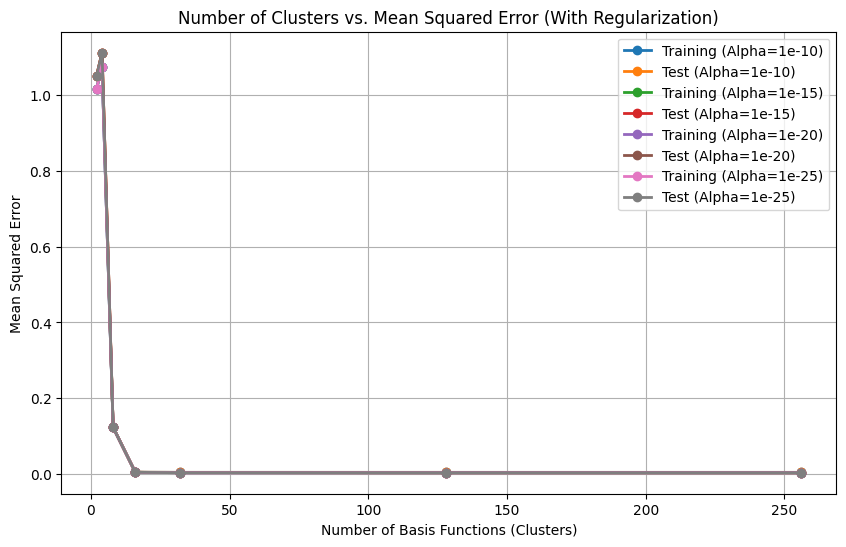

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset 2 from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Model complexities (Number of basis functions)
complexity_values = [2, 4, 8, 16, 32, 128, 256]

alpha_values = [1e-10, 1e-15,1e-20,1e-25 ]  # Regularization parameter values for Ridge regression

mse_train_values = []
mse_test_values = []

# Iterate through different numbers of clusters (complexity values) and regularization parameters
for num_clusters in complexity_values:
    mse_train_alpha = []
    mse_test_alpha = []

    for alpha in alpha_values:
        # Step 1: Divide Data into Training and Test Sets
        X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

        # Step 2: Apply K-means Clustering for Gaussian Basis Functions
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(X_train)
        cluster_centers = kmeans.cluster_centers_

        # Step 3: Train Linear Regression Models with Gaussian Basis Functions and Regularization
        def gaussian_basis_functions(X, centers, width=1):
            return np.exp(-np.square(np.linalg.norm(X[:, np.newaxis] - centers, axis=2)) / (2 * width ** 2))

        # Compute Gaussian basis functions for training data
        phi_train = gaussian_basis_functions(X_train.values, cluster_centers)

        # Train Ridge regression model with regularization
        model = Ridge(alpha=alpha)
        model.fit(phi_train, y_train)

        # Compute Gaussian basis functions for test data
        phi_test = gaussian_basis_functions(X_test.values, cluster_centers)

        # Make predictions for training and test data
        predictions_train = model.predict(phi_train)
        predictions_test = model.predict(phi_test)

        # Calculate mean squared error for training and test data
        mse_train = mean_squared_error(y_train, predictions_train)
        mse_test = mean_squared_error(y_test, predictions_test)

        mse_train_alpha.append(mse_train)
        mse_test_alpha.append(mse_test)

    mse_train_values.append(mse_train_alpha)
    mse_test_values.append(mse_test_alpha)

# Plot MSE values against model complexity (number of clusters) for different regularization parameters
plt.figure(figsize=(10, 6))

for i, alpha in enumerate(alpha_values):
    plt.plot(complexity_values, [mse[i] for mse in mse_train_values], marker='o', linestyle='-', linewidth=2, label=f'Training (Alpha={alpha})')
    plt.plot(complexity_values, [mse[i] for mse in mse_test_values], marker='o', linestyle='-', linewidth=2, label=f'Test (Alpha={alpha})')

plt.xlabel('Number of Basis Functions (Clusters)')
plt.ylabel('Mean Squared Error')
plt.title('Number of Clusters vs. Mean Squared Error (With Regularization)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


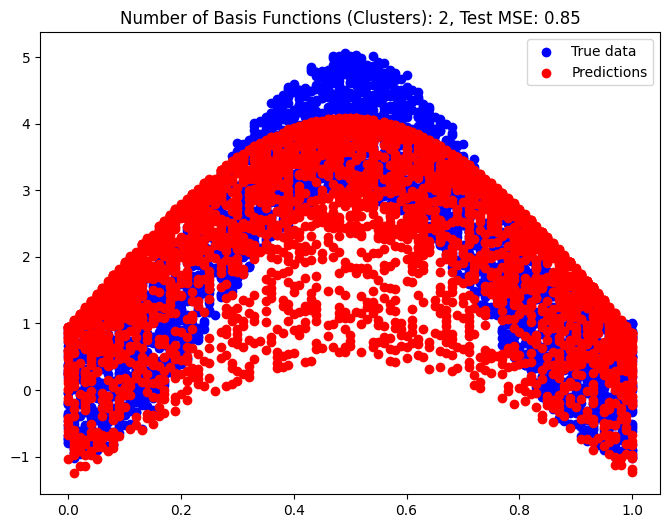

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


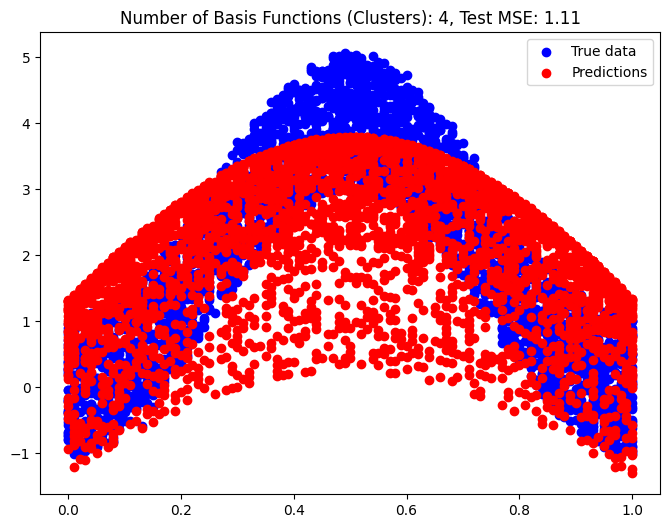

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


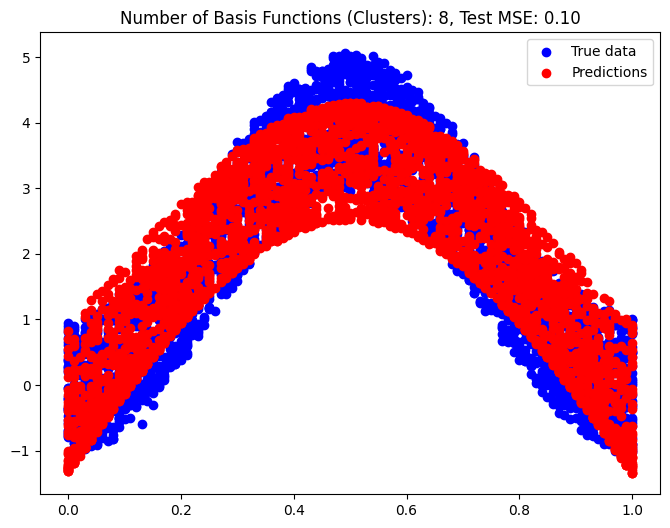

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


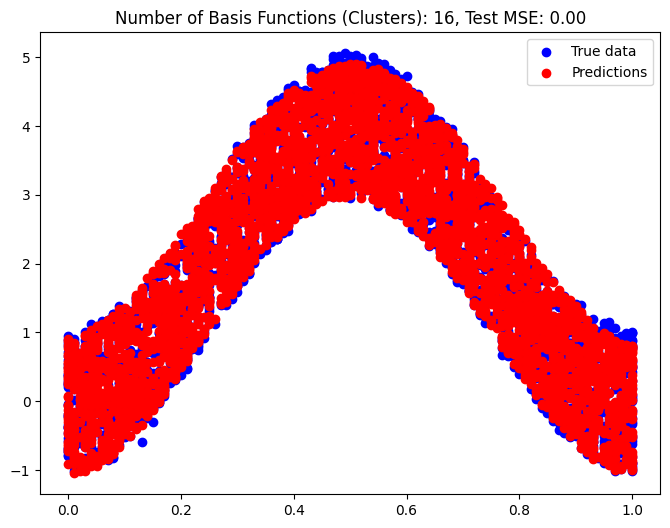

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


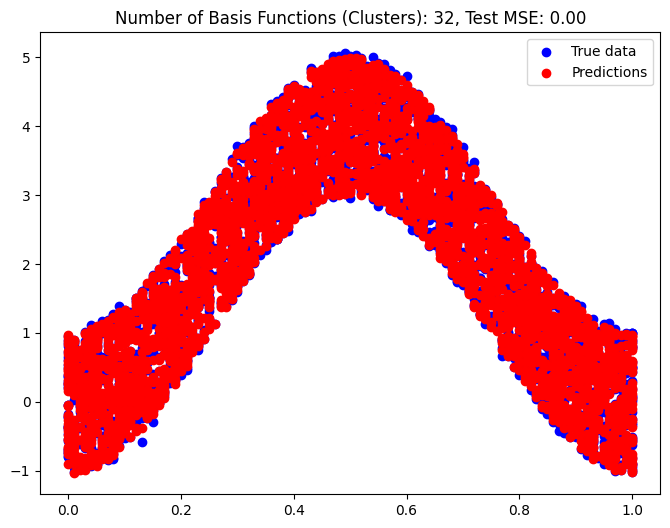

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


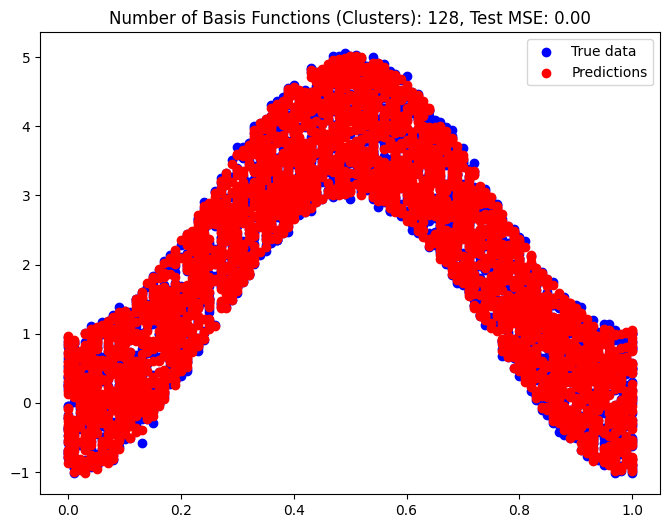

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


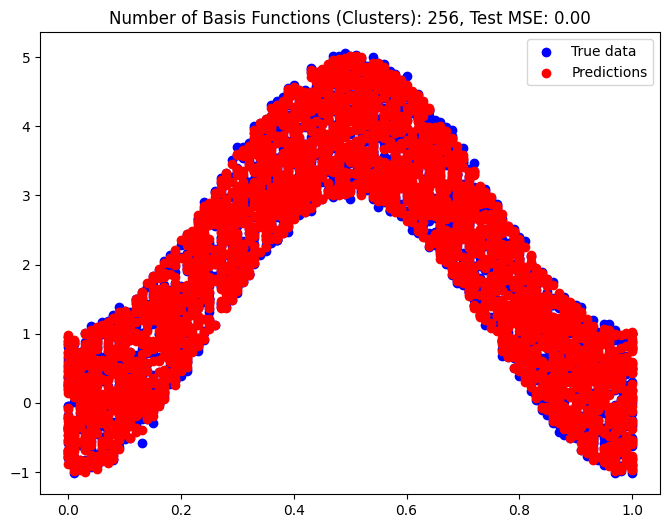

In [5]:


# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    # Step 1: Divide Data into Training and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

    # Step 2: Apply K-means Clustering for Gaussian Basis Functions
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_train)
    cluster_centers = kmeans.cluster_centers_

    # Calculate the farthest distance between cluster centers
    farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))

    # Calculate width as (farthest distance / sqrt(2))
    width = np.sqrt(farthest_distance) / np.sqrt(2)

    # Step 3: Train Linear Regression Models with Gaussian Basis Functions
    def gaussian_basis_functions(X, centers, width=1):
        return np.exp(-np.square(np.linalg.norm(X[:, np.newaxis] - centers, axis=2)) / (2 * width ** 2))

    # Compute Gaussian basis functions for training data with the calculated width
    phi_train = gaussian_basis_functions(X_train.values, cluster_centers, width=width)

    # Train linear regression model
    model = LinearRegression()
    model.fit(phi_train, y_train)

    # Compute Gaussian basis functions for test data with the same width
    phi_test = gaussian_basis_functions(X_test.values, cluster_centers, width=width)

    # Make predictions for training and test data
    predictions_train = model.predict(phi_train)
    predictions_test = model.predict(phi_test)

    # Calculate mean squared error for training and test data
    mse_train = mean_squared_error(y_train, predictions_train)
    mse_test = mean_squared_error(y_test, predictions_test)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

    # Plot the approximated function for test data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['x1'], y_test, color='blue', label='True data')
    plt.scatter(X_test['x1'], predictions_test, color='red', label='Predictions')
    plt.title(f'Number of Basis Functions (Clusters): {num_clusters}, Test MSE: {mse_test:.2f}')
    plt.legend()
    plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


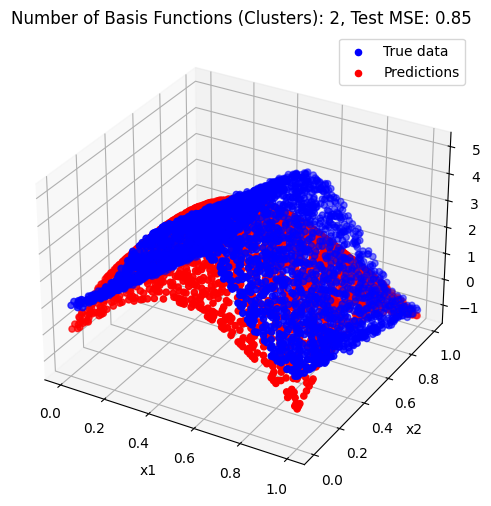

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


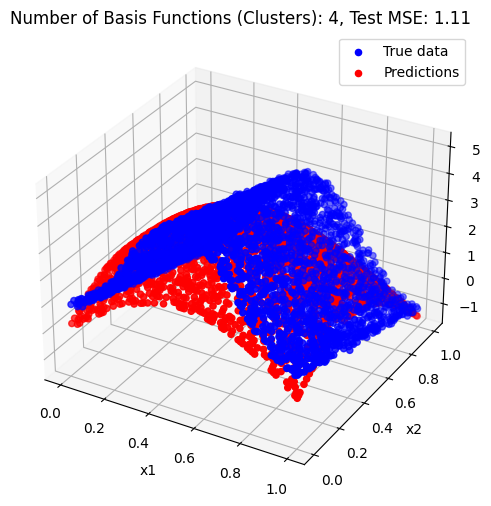

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


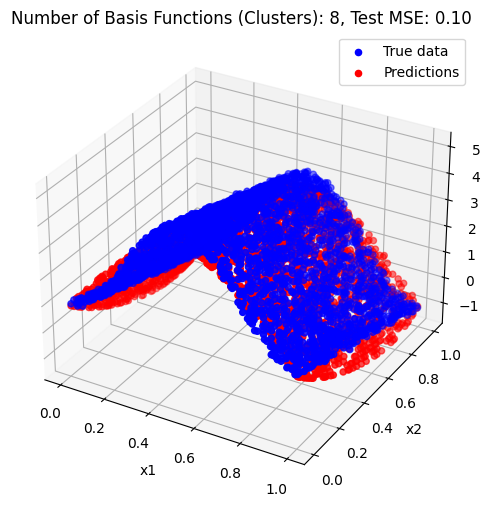

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


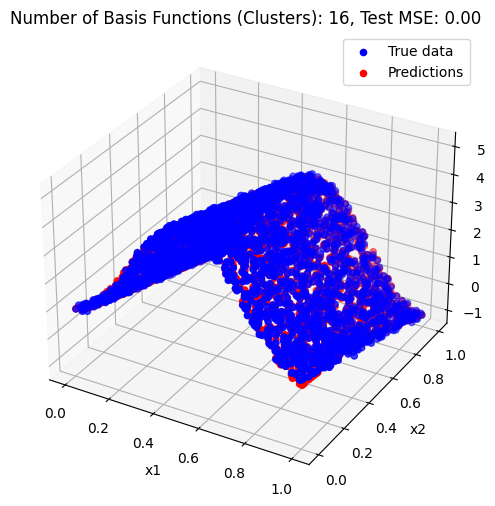

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


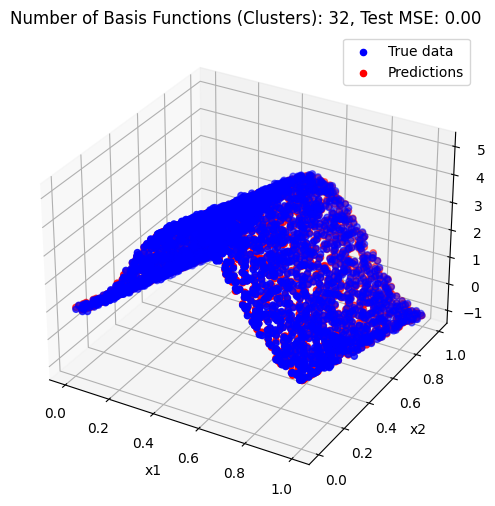

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


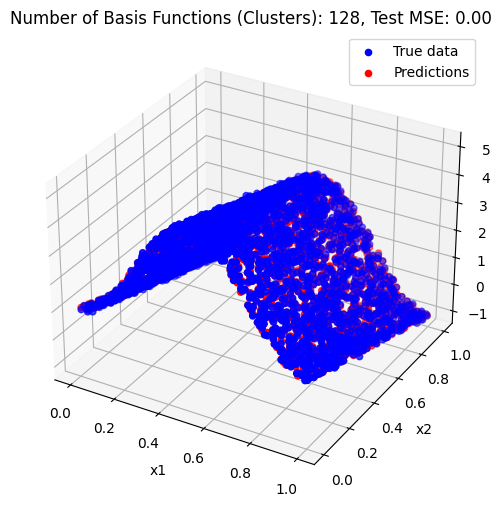

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


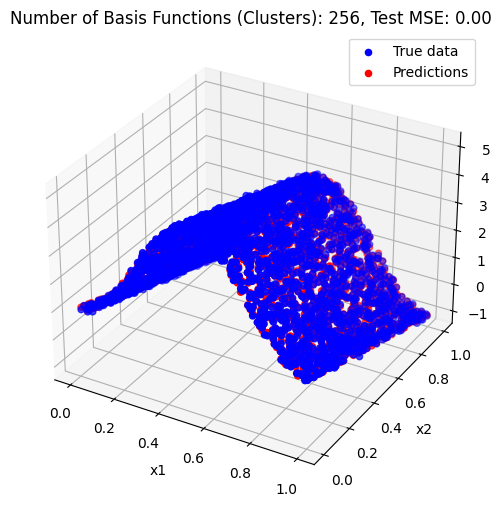

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ... (previous code remains unchanged)

# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    # Step 1: Divide Data into Training and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

    # Step 2: Apply K-means Clustering for Gaussian Basis Functions
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_train)
    cluster_centers = kmeans.cluster_centers_

    # Calculate the farthest distance between cluster centers
    farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))

    # Calculate width as (farthest distance / sqrt(2))
    width = np.sqrt(farthest_distance) / np.sqrt(2)

    # Step 3: Train Linear Regression Models with Gaussian Basis Functions
    def gaussian_basis_functions(X, centers, width=1):
        return np.exp(-np.square(np.linalg.norm(X[:, np.newaxis] - centers, axis=2)) / (2 * width ** 2))

    # Compute Gaussian basis functions for training data with the calculated width
    phi_train = gaussian_basis_functions(X_train.values, cluster_centers, width=width)

    # Train linear regression model
    model = LinearRegression()
    model.fit(phi_train, y_train)

    # Compute Gaussian basis functions for test data with the same width
    phi_test = gaussian_basis_functions(X_test.values, cluster_centers, width=width)

    # Make predictions for test data
    predictions_test = model.predict(phi_test)

    # Calculate mean squared error for test data
    mse_test = mean_squared_error(y_test, predictions_test)

    mse_test_values.append(mse_test)

    # Plot the 3D approximated function for test data
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test['x1'], X_test['x2'], y_test, color='blue', label='True data')
    ax.scatter(X_test['x1'], X_test['x2'], predictions_test, color='red', label='Predictions')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Predicted y')
    ax.set_title(f'Number of Basis Functions (Clusters): {num_clusters}, Test MSE: {mse_test:.2f}')
    plt.legend()
    plt.show()

# ... (rest of the code remains unchanged)
